<div align="center"> 

---

# **MRI metrics**

</div>


---
# <u> **Description:**</u>

Magnetic resonance imaging of alcohol

---

## **Acquisitions**

- sMRI
- rsMRI
- dMRI

## **Stages**

- T1: Prior to the initiation of the IA2BC model
- T2: During half of the IA2BC model
- T3: After 20 sessions of the IA2BC and prior abstinence phase
- T5: Finishing the whole protocol, after releapse phase

---

**Variables to consider:** 
  - Session
  - Sex  
  
**Analysis:**
  1. sMRI
      - Deformation based morphometry
  2. rsMRI
      - Network based statistics
  3. dMRI 
      - Tractography

---

## **Workflow**

Deformation based morphometry

0. Running through HCP cluster
1. Data preparation
2. Exploratory data analysis
3. Analyses
4. Visualization

Network based statistics

0. Running through HCP cluster
1. Data preparation
2. Exploratory data analysis
3. Analyses
4. Visualization


### **General settings options**

In [1]:
addTaskCallback(function(...) {set.seed(42);TRUE})
options(warn=-1) # to turn off warnings
#options(warn=0) # to turn on warnings
options(repr.plot.width=15, repr.plot.height=12) # to resize plots

2 
2

In [2]:
setwd("../")

## **General preparation**

### **Load  R packages and dependencies.** 

  The following packages are needed for the to move on, firstly it is needed to download pacman library

 ---

In [3]:
# Make sure to install pacman before we begin
  if (!require("pacman")) {
  install.packages("pacman")
  }

# Load required packages  
  pacman::p_load(tidyverse,devtools,ggpubr,janitor,magrittr,readxl,lme4,rstatix,emmeans,cowplot,scales,effects)


Loading required package: pacman



In [4]:
theme_phases = function(x,rois_names,n){ x + theme(text = element_text(family = "Times New Roman"),
                                                   plot.title = element_blank()) +
    ylim(c(NA,max(Jdata_jacobians[rois_names[n]])+0.05)) +
    annotate("rect", xmin=c(43), xmax=c(91), ymin=c(max(Jdata_jacobians[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians[rois_names[n]])+0.04), alpha=0.3, fill="#5C8A74") +
    annotate(geom = "text", x = 67, y = max(Jdata_jacobians[rois_names[n]])+0.025,label = "First IA2BC phase", size = 4.2, fontface = 2) + 
    annotate("rect", xmin=c(91), xmax=c(110), ymin=c(max(Jdata_jacobians[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians[rois_names[n]])+0.04), alpha=0.3, fill="#B58666") +
    annotate(geom = "text", x = 100, y = max(Jdata_jacobians[rois_names[n]])+0.025,label = "Abstinence", size = 4.2, fontface = 2) + 
    annotate("rect", xmin=c(110), xmax=c(175), ymin=c(max(Jdata_jacobians[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians[rois_names[n]])+0.04), alpha=0.3, fill="#668DB5") +
    annotate(geom = "text", x = 140, y = max(Jdata_jacobians[rois_names[n]])+0.025,label = "Relapse phase", size = 4.2, fontface = 2)    
                          }

In [5]:
theme_phases_res = function(x,rois_names,n){ x + theme(text = element_text(family = "Times New Roman"),
                                                   plot.title = element_blank()) +
    ylim(c(min(Jdata_jacobians_residuals[rois_names[n]])-0.05,max(Jdata_jacobians_residuals[rois_names[n]])+0.05)) +
    annotate("rect", xmin=c(43), xmax=c(91), ymin=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.04), alpha=0.3, fill="#5C8A74") +
    annotate(geom = "text", x = 67, y = max(Jdata_jacobians_residuals[rois_names[n]])+0.025,label = "First IA2BC phase", size = 4, fontface = 2) + 
    annotate("rect", xmin=c(91), xmax=c(110), ymin=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.04), alpha=0.3, fill="#B58666") +
    annotate(geom = "text", x = 100, y = max(Jdata_jacobians_residuals[rois_names[n]])+0.025,label = "Abstinence", size = 4, fontface = 2) + 
    annotate("rect", xmin=c(110), xmax=c(175), ymin=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.04), alpha=1, fill="white") +
    annotate("rect", xmin=c(110), xmax=c(175), ymin=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.01) , ymax=c(max(Jdata_jacobians_residuals[rois_names[n]])+0.04), alpha=0.3, fill="#668DB5") +
    annotate(geom = "text", x = 140, y = max(Jdata_jacobians_residuals[rois_names[n]])+0.025,label = "Relapse phase", size = 4, fontface = 2)    
                          }

# **Deformation based morphometry**

## **0. Running through HCP cluster**

- [Average](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DBM/01_rat-average.sh)
- [Preprocessing](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DBM/02_rat_preproc.sh)
- [Creating csv input](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DBM/03-1_inputCsv.sh)
- [Obtaining jacobians](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DBM/03_jacobians_invivo.sh)
- [Fitting models](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DBM/04_RMINC.R)
- [Calculate trayectories](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/DBM/05_extractJac_poly.R)

In [6]:
dir.create("Data/MRI/Atlas/")

In [7]:
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/Atlas/ROIs_atlas/ROI_mask.nii.gz Data/MRI/Atlas/",
       intern = T)

In [7]:
dir.create("code/DBM/")

In [5]:
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/smri/DBM_invivo/code/* code/DBM/",intern = T)

character(0)
attr(,"status")
[1] 1

In [5]:
dir.create("Data/MRI/DBM/tmaps")

In [6]:
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/smri/DBM_invivo/DBM/tmaps/*gz Data/MRI/DBM/tmaps/",
       intern = T)

character(0)

In [6]:
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/smri/DBM_invivo/DBM/Trayectories/*csv Data/MRI/DBM/",
       intern = T)

character(0)

In [7]:
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/smri/DBM_invivo/jacobians/output/secondlevel/secondlevel_template0.nii.gz Data/MRI/DBM/",
       intern = T)

character(0)

In [5]:
dir.create("Data/MRI/DBM_exvivo/tmaps", recursive = T)

In [ ]:
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/smri/DBM_exvivo/DBM/Trayectories/Jdata_jacobians.csv Data/MRI/DBM_exvivo/",
       intern = T)

## **0.1 Quality control**

- Average and preprocessing

<div align="center">   

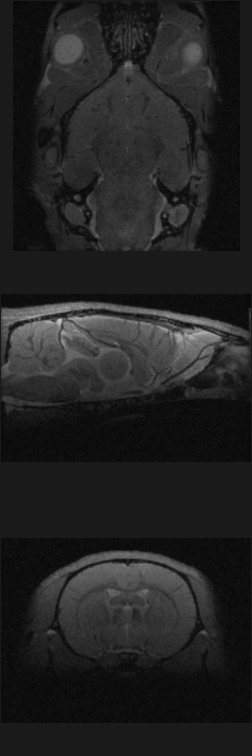 
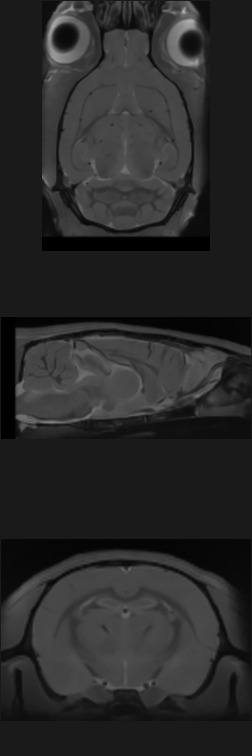
   
</div>


## **1 Trayectories**

In [32]:
output_receive=system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/smri/DBM_invivo/DBM/Tray*RData Data/MRI/DBM/",
                   intern = T)

In [5]:
load("Data/MRI/DBM/Trayectories_data1.RData")
load("Data/MRI/DBM/Trayectories_data2.RData")
load("Data/MRI/DBM/Trayectories_data3.RData")
load("Data/MRI/DBM/Trayectories_data4.RData")

In [ ]:
Jdata_jacobians <- read_csv("Data/MRI/DBM/Jdata_jacobians.csv")

In [ ]:
# peak ROIs obtained by all models
ROI_table %>% filter(Type == "Poly") %>% group_by(Model2) %>% select(ROIs) %>% unique()

In [ ]:
# peak ROIs obtained by all models
ROI_table %>% filter(Type == "Linear") %>% group_by(Model2) %>% select(ROIs) %>% unique()

Don't know how to automatically pick scale for object of type mincVoxel/vector. Defaulting to continuous.



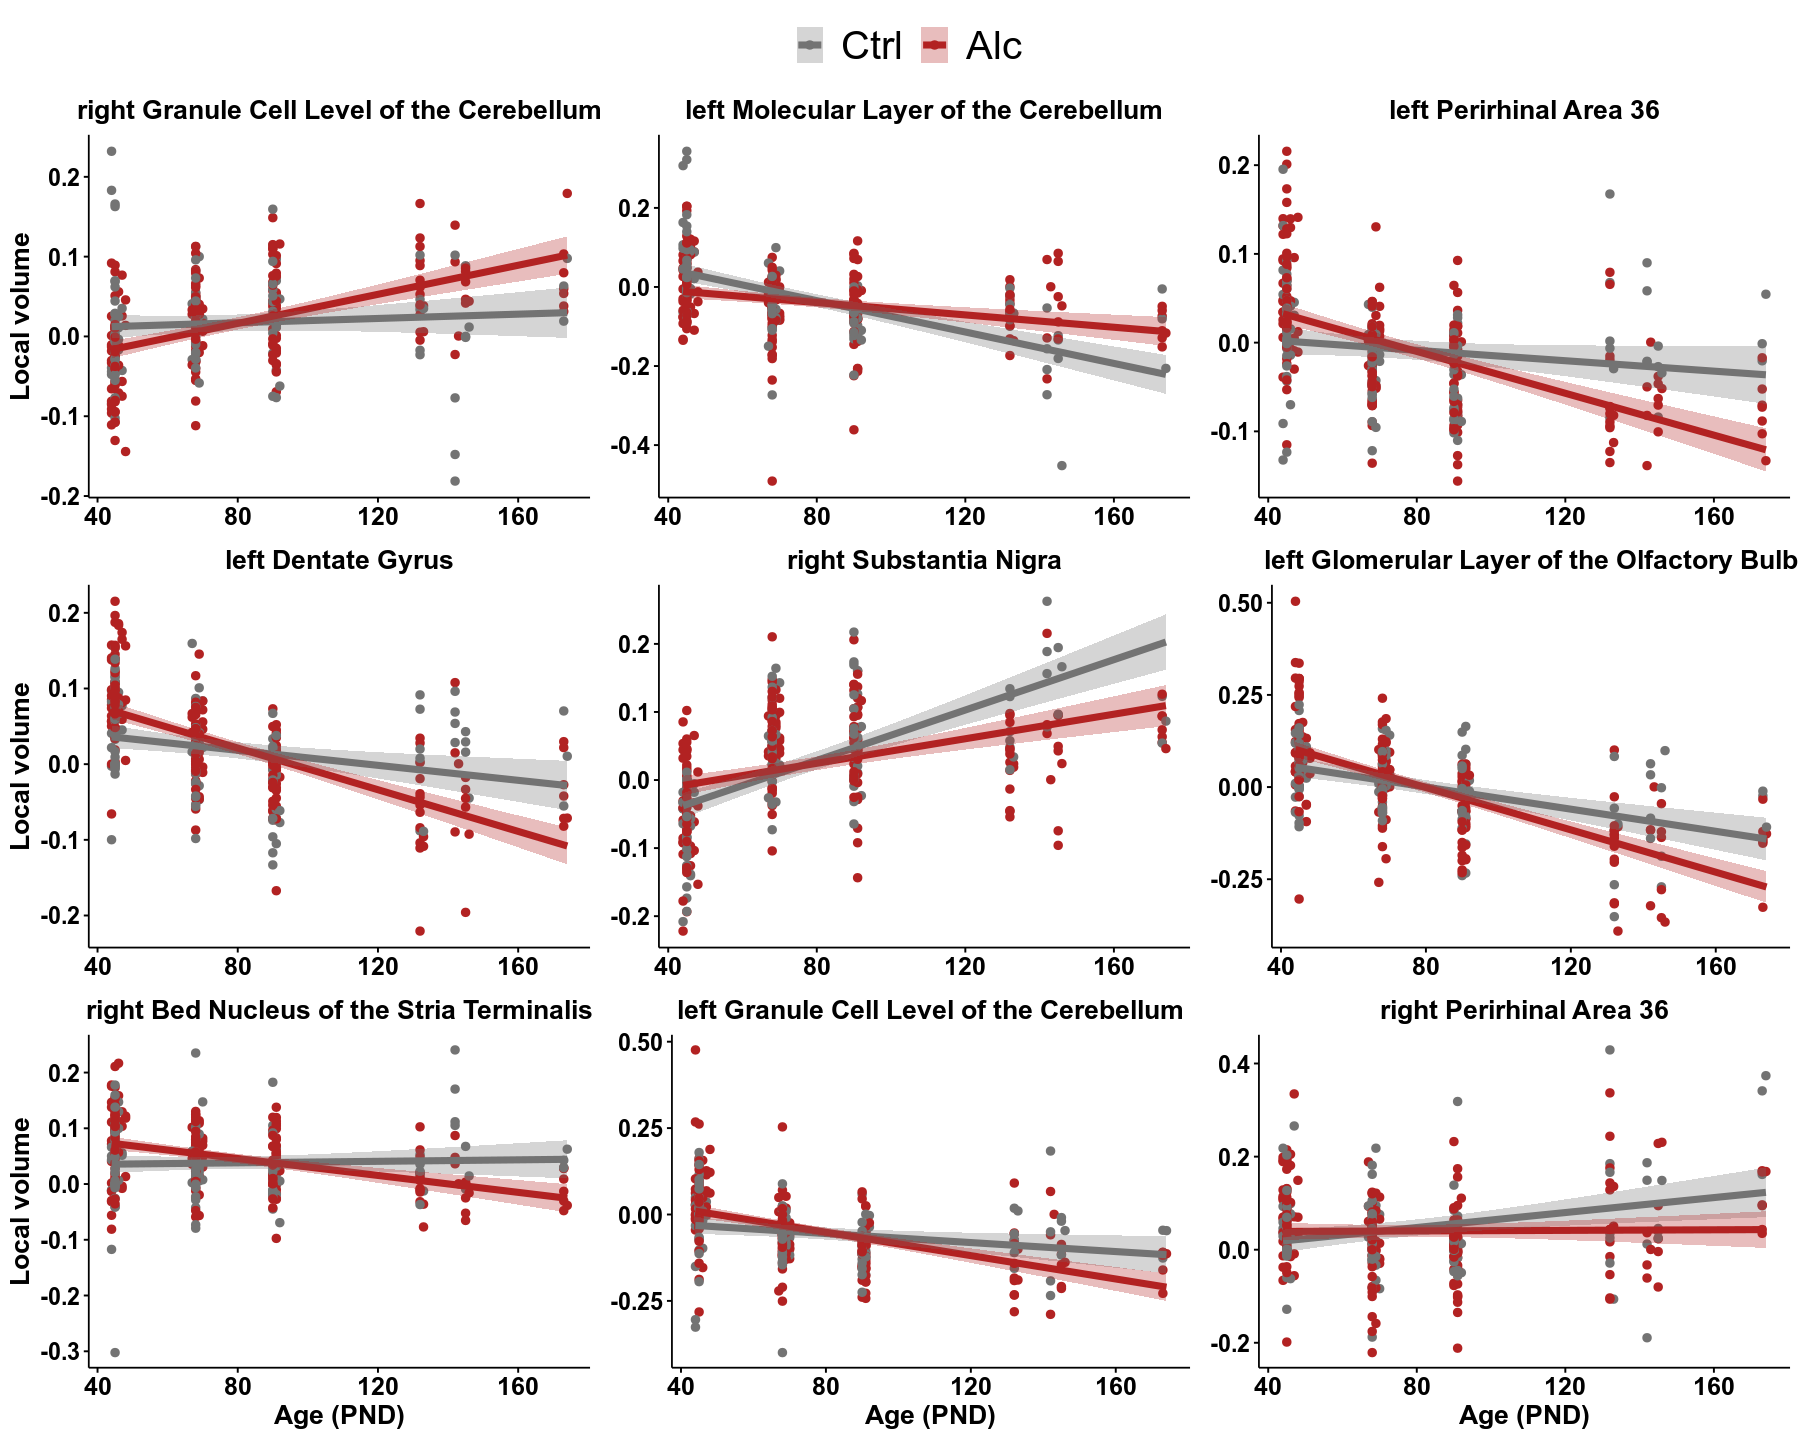

In [36]:
M1_legend = get_legend(plots_ROIs_L[[1]] + 
                  theme(legend.position = "bottom",legend.title=element_blank(),legend.text = element_text(size = 24) ))

suppressMessages(
plots_model1 <- ggarrange(ggplot() + theme_void(),as_ggplot(M1_legend),ggplot() + theme_void(), 
          plots_ROIs_L$right_granule_cell_level_of_the_cerebellum_Lmod1_peaks + theme(axis.title.x = element_blank()),
          plots_ROIs_L$left_molecular_layer_of_the_cerebellum_left_Lmod1_peaks + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_L$left_perirhinal_area_36_left_Lmod1_peaks + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_L$left_dentate_gyrus_left_Lmod1_peaks + theme(axis.title.x = element_blank()),
          plots_ROIs_L$right_substantia_nigra_Lmod1_peaks + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_L$left_glomerular_layer_of_the_olfactory_bulb_left_Lmod1_peaks + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_L$right_bed_nucleus_of_the_stria_terminalis_Lmod1_peaks,
          plots_ROIs_L$left_granule_cell_level_of_the_cerebellum_left_Lmod1_peaks + theme(axis.title.y = element_blank()),
          plots_ROIs_L$right_perirhinal_area_36_Lmod1_peaks + theme(axis.title.y = element_blank()),
                         nrow = 4, ncol = 3, heights = c(0.2,1,1,1), 
                         font.label=list(color="black",size=22,face="bold", family = "Times New Roman"))
    )
plots_model1

Don't know how to automatically pick scale for object of type mincVoxel/vector. Defaulting to continuous.



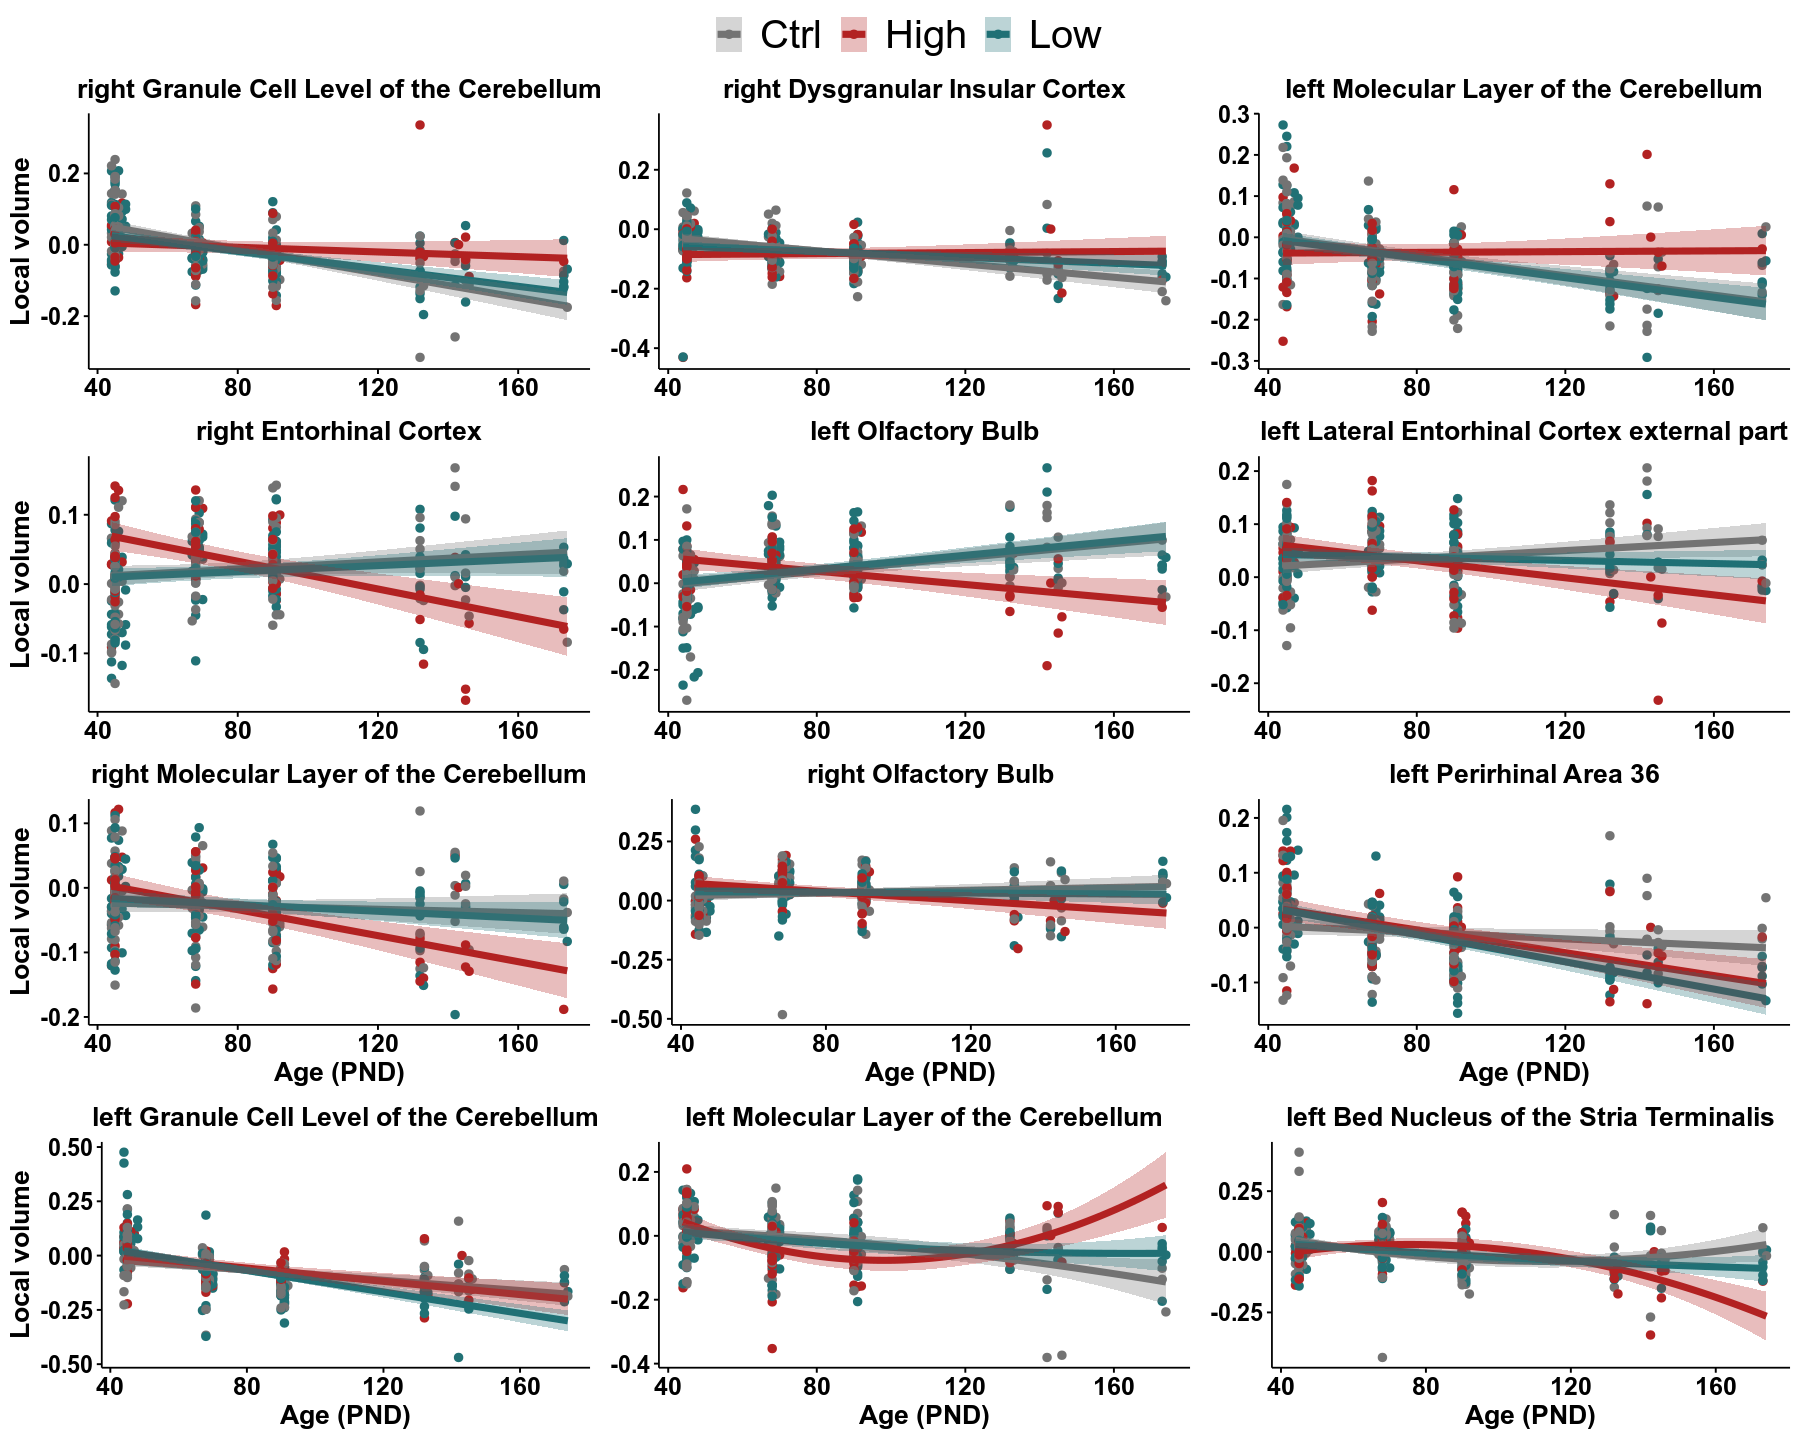

In [37]:
mod = "Lmod2"
rois_names_L <- str_subset(names(plots_ROIs),pattern = mod)

mod = "Pmod2"
rois_names_P <- str_subset(names(plots_ROIs),pattern = mod)

M2_legend = get_legend(plots_ROIs_Intake_L[[1]] + 
                  theme(legend.position = "bottom",legend.title=element_blank(),legend.text = element_text(size = 24) ))

suppressMessages(
plots_model2 <- ggarrange(ggplot() + theme_void(),as_ggplot(M2_legend),ggplot() + theme_void(),
          plots_ROIs_Intake_L[[rois_names_L[1]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[2]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[3]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[4]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[5]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[6]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[7]]],
          plots_ROIs_Intake_L[[rois_names_L[8]]] + theme(axis.title.y = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[9]]] + theme(axis.title.y = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[10]]],
          plots_ROIs_Intake[[rois_names_P[1]]] + theme(axis.title.y = element_blank()),
          plots_ROIs_Intake[[rois_names_P[2]]] + theme(axis.title.y = element_blank()),
          ncol = 3, nrow = 5, heights = c(0.2,1,1,1,1), font.label=list(color="black",size=22,face="bold", family = "Times New Roman"))
    )
plots_model2

Don't know how to automatically pick scale for object of type mincVoxel/vector. Defaulting to continuous.



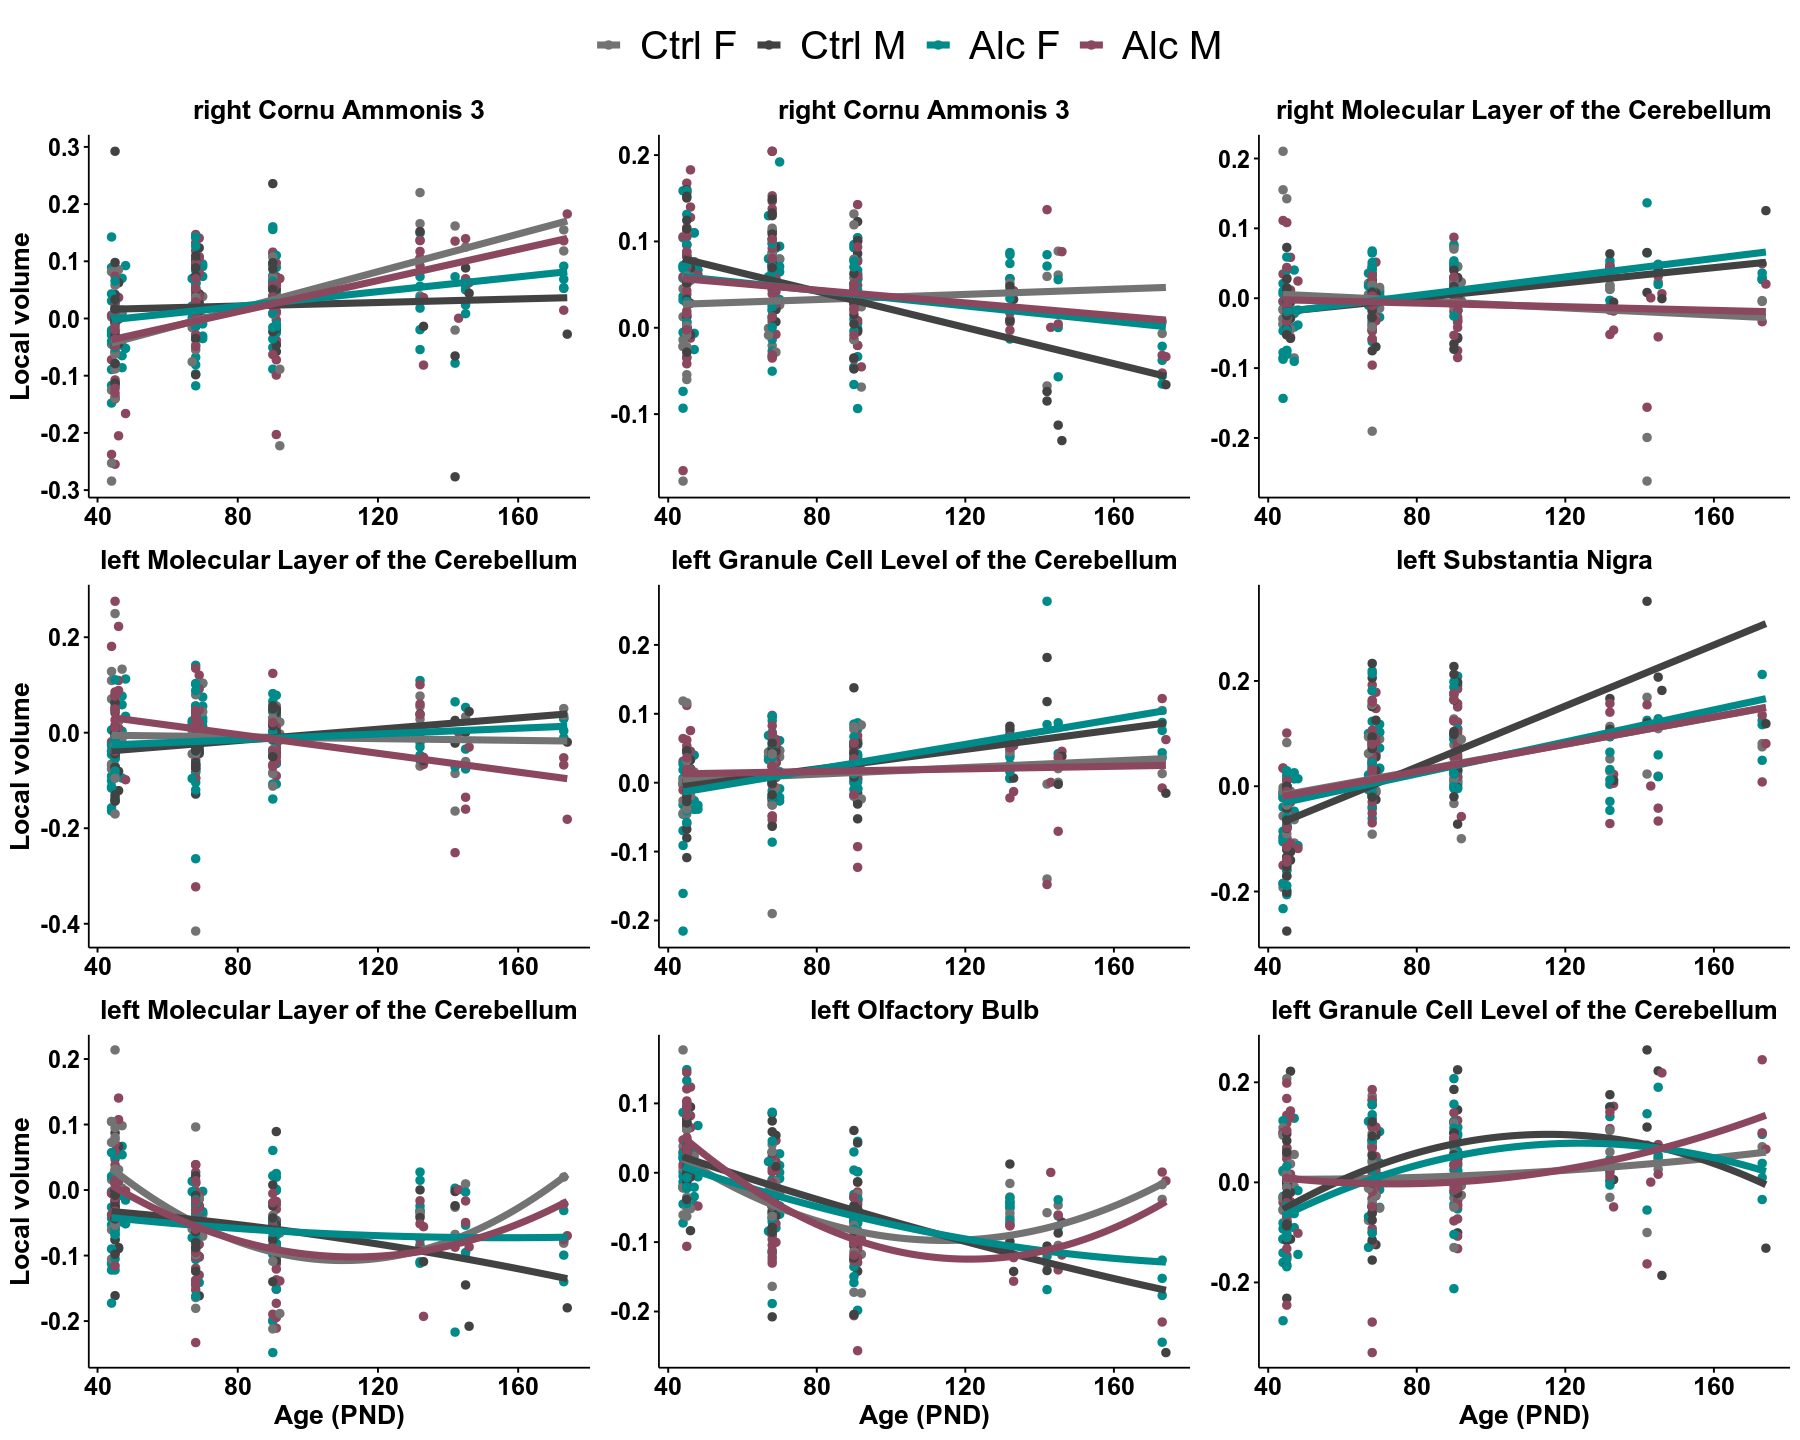

In [38]:
mod = "Lmod3"
rois_names_L <- str_subset(names(plots_ROIs),pattern = mod)

mod = "Pmod3"
rois_names_P <- str_subset(names(plots_ROIs),pattern = mod)

M3_legend = get_legend(plots_ROIs_sex_L[[1]] + 
                  theme(legend.position = "bottom",legend.title=element_blank(),legend.text = element_text(size = 24) ))

suppressMessages(
plots_model3 <- ggarrange(ggplot() + theme_void(),as_ggplot(M3_legend),ggplot() + theme_void(),
          plots_ROIs_sex_L[[rois_names_L[1]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_sex_L[[rois_names_L[2]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_sex_L[[rois_names_L[3]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_sex_L[[rois_names_L[4]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_sex_L[[rois_names_L[5]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_sex_L[[rois_names_L[6]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_sex[[rois_names_P[1]]],
          plots_ROIs_sex[[rois_names_P[2]]] + theme(axis.title.y = element_blank()),
          plots_ROIs_sex[[rois_names_P[3]]] + theme(axis.title.y = element_blank()), 
                          ncol = 3, nrow = 4, heights = c(0.2,1,1,1), 
                          font.label=list(color="black",size=22,face="bold", family = "Times New Roman"))
    )
plots_model3

Don't know how to automatically pick scale for object of type mincVoxel/vector. Defaulting to continuous.



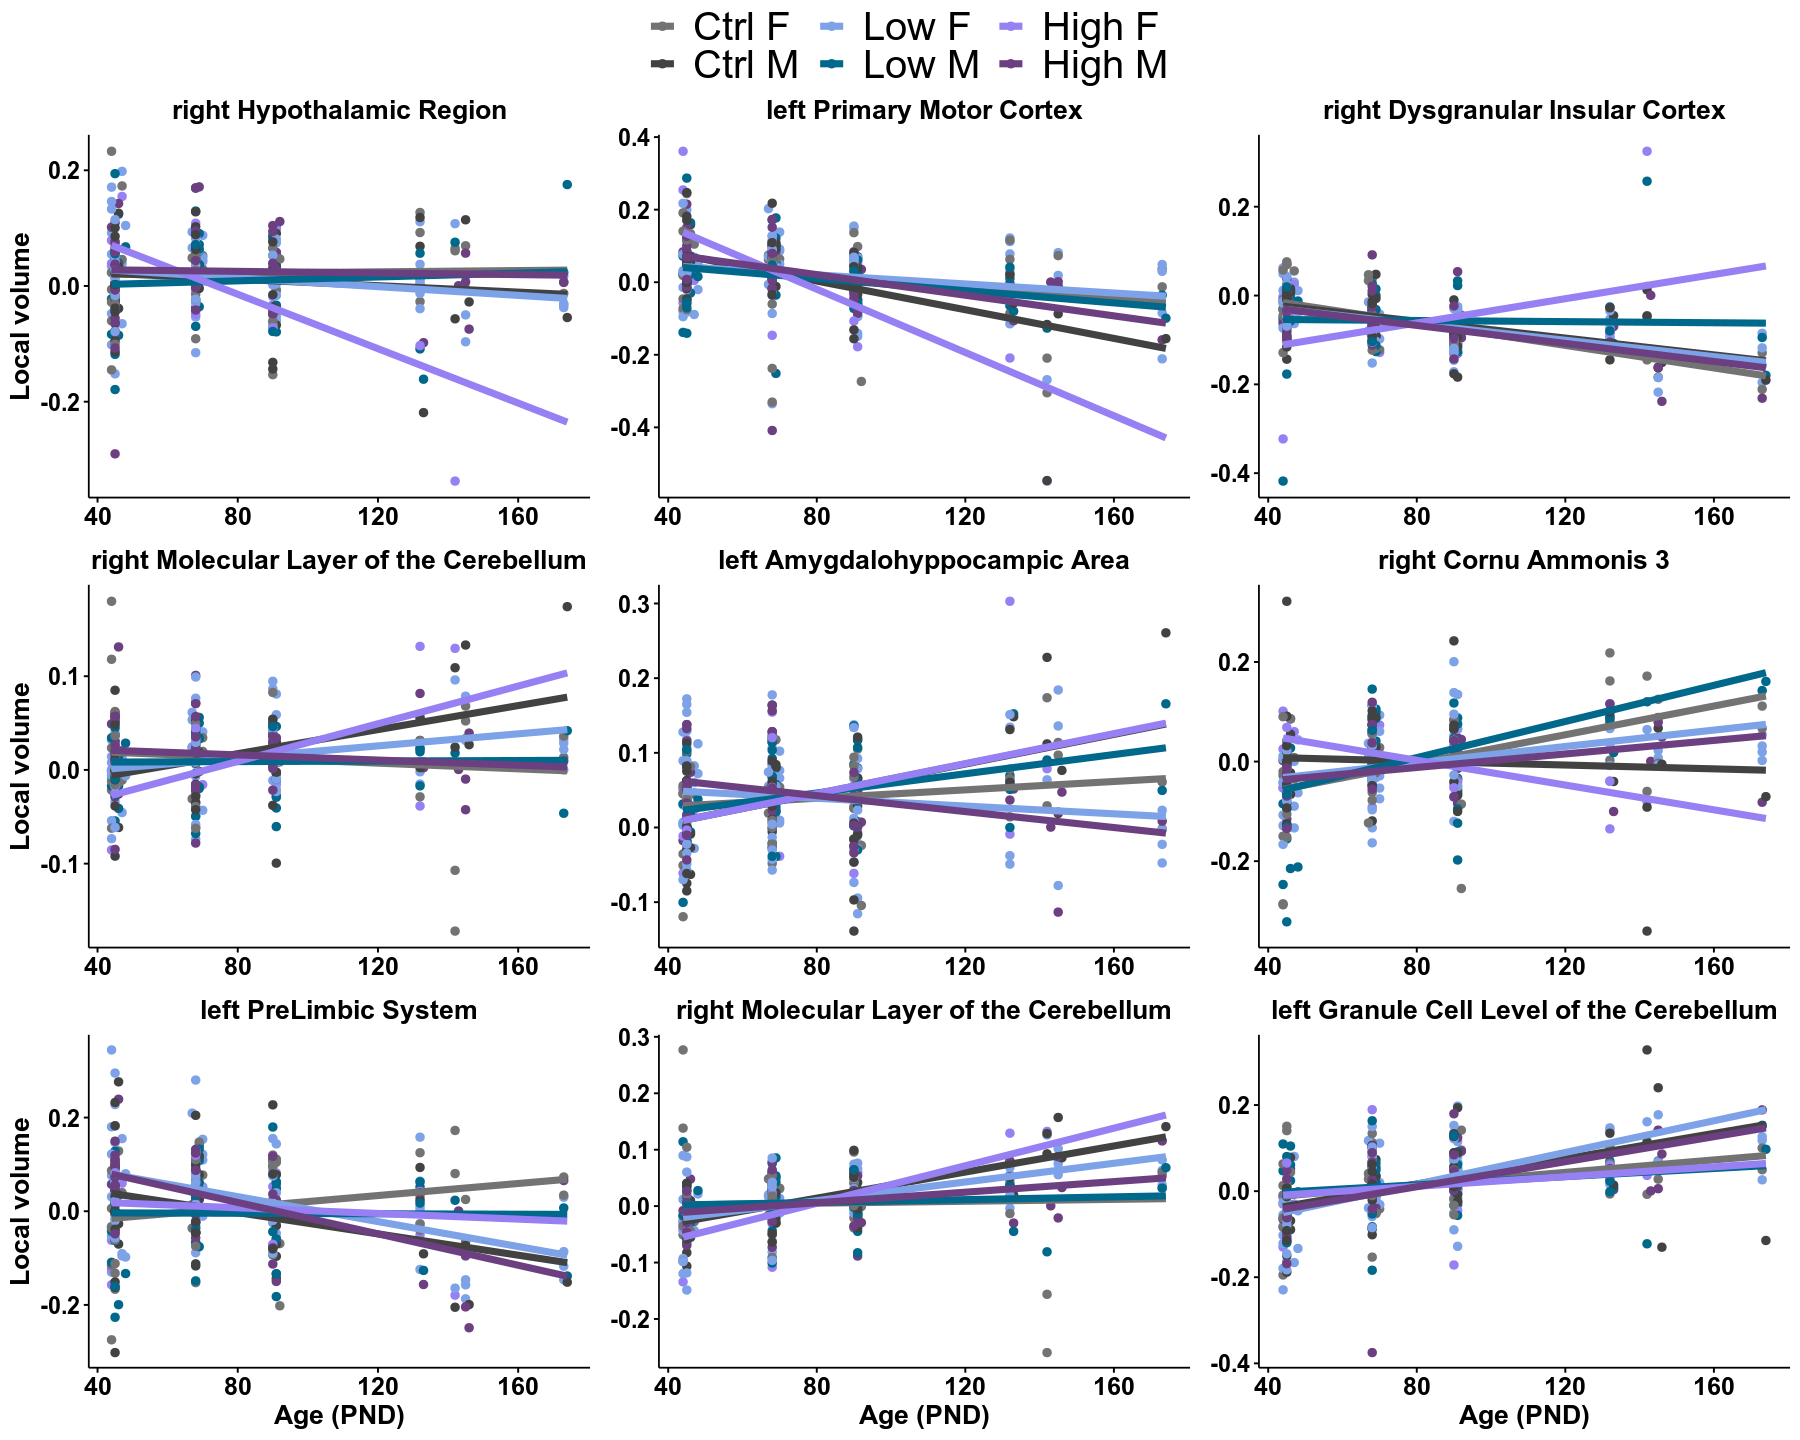

In [39]:
mod = "Lmod4"
rois_names_L <- str_subset(names(plots_ROIs),pattern = mod)

mod = "Pmod4"
rois_names_P <- str_subset(names(plots_ROIs),pattern = mod)

M4_legend = get_legend(plots_ROIs_Intake_sex_L[[1]] + 
                  theme(legend.position = "bottom",legend.title=element_blank(),legend.text = element_text(size = 24)) )

suppressMessages(
plots_model4_1 <- ggarrange(ggplot() + theme_void(),as_ggplot(M4_legend),ggplot() + theme_void(),
          plots_ROIs_Intake_sex_L[[rois_names_L[1]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_Intake_sex_L[[rois_names_L[2]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_sex_L[[rois_names_L[3]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_sex_L[[rois_names_L[4]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_Intake_sex_L[[rois_names_L[5]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_sex_L[[rois_names_L[6]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_sex_L[[rois_names_L[7]]],
          plots_ROIs_Intake_sex_L[[rois_names_L[8]]] + theme(axis.title.y = element_blank()),
          plots_ROIs_Intake_sex_L[[rois_names_L[9]]] + theme(axis.title.y = element_blank()),
                            ncol = 3, nrow = 4, heights = c(0.2,1,1,1), 
                            font.label=list(color="black",size=22,face="bold", family = "Times New Roman"))
    )
plots_model4_1

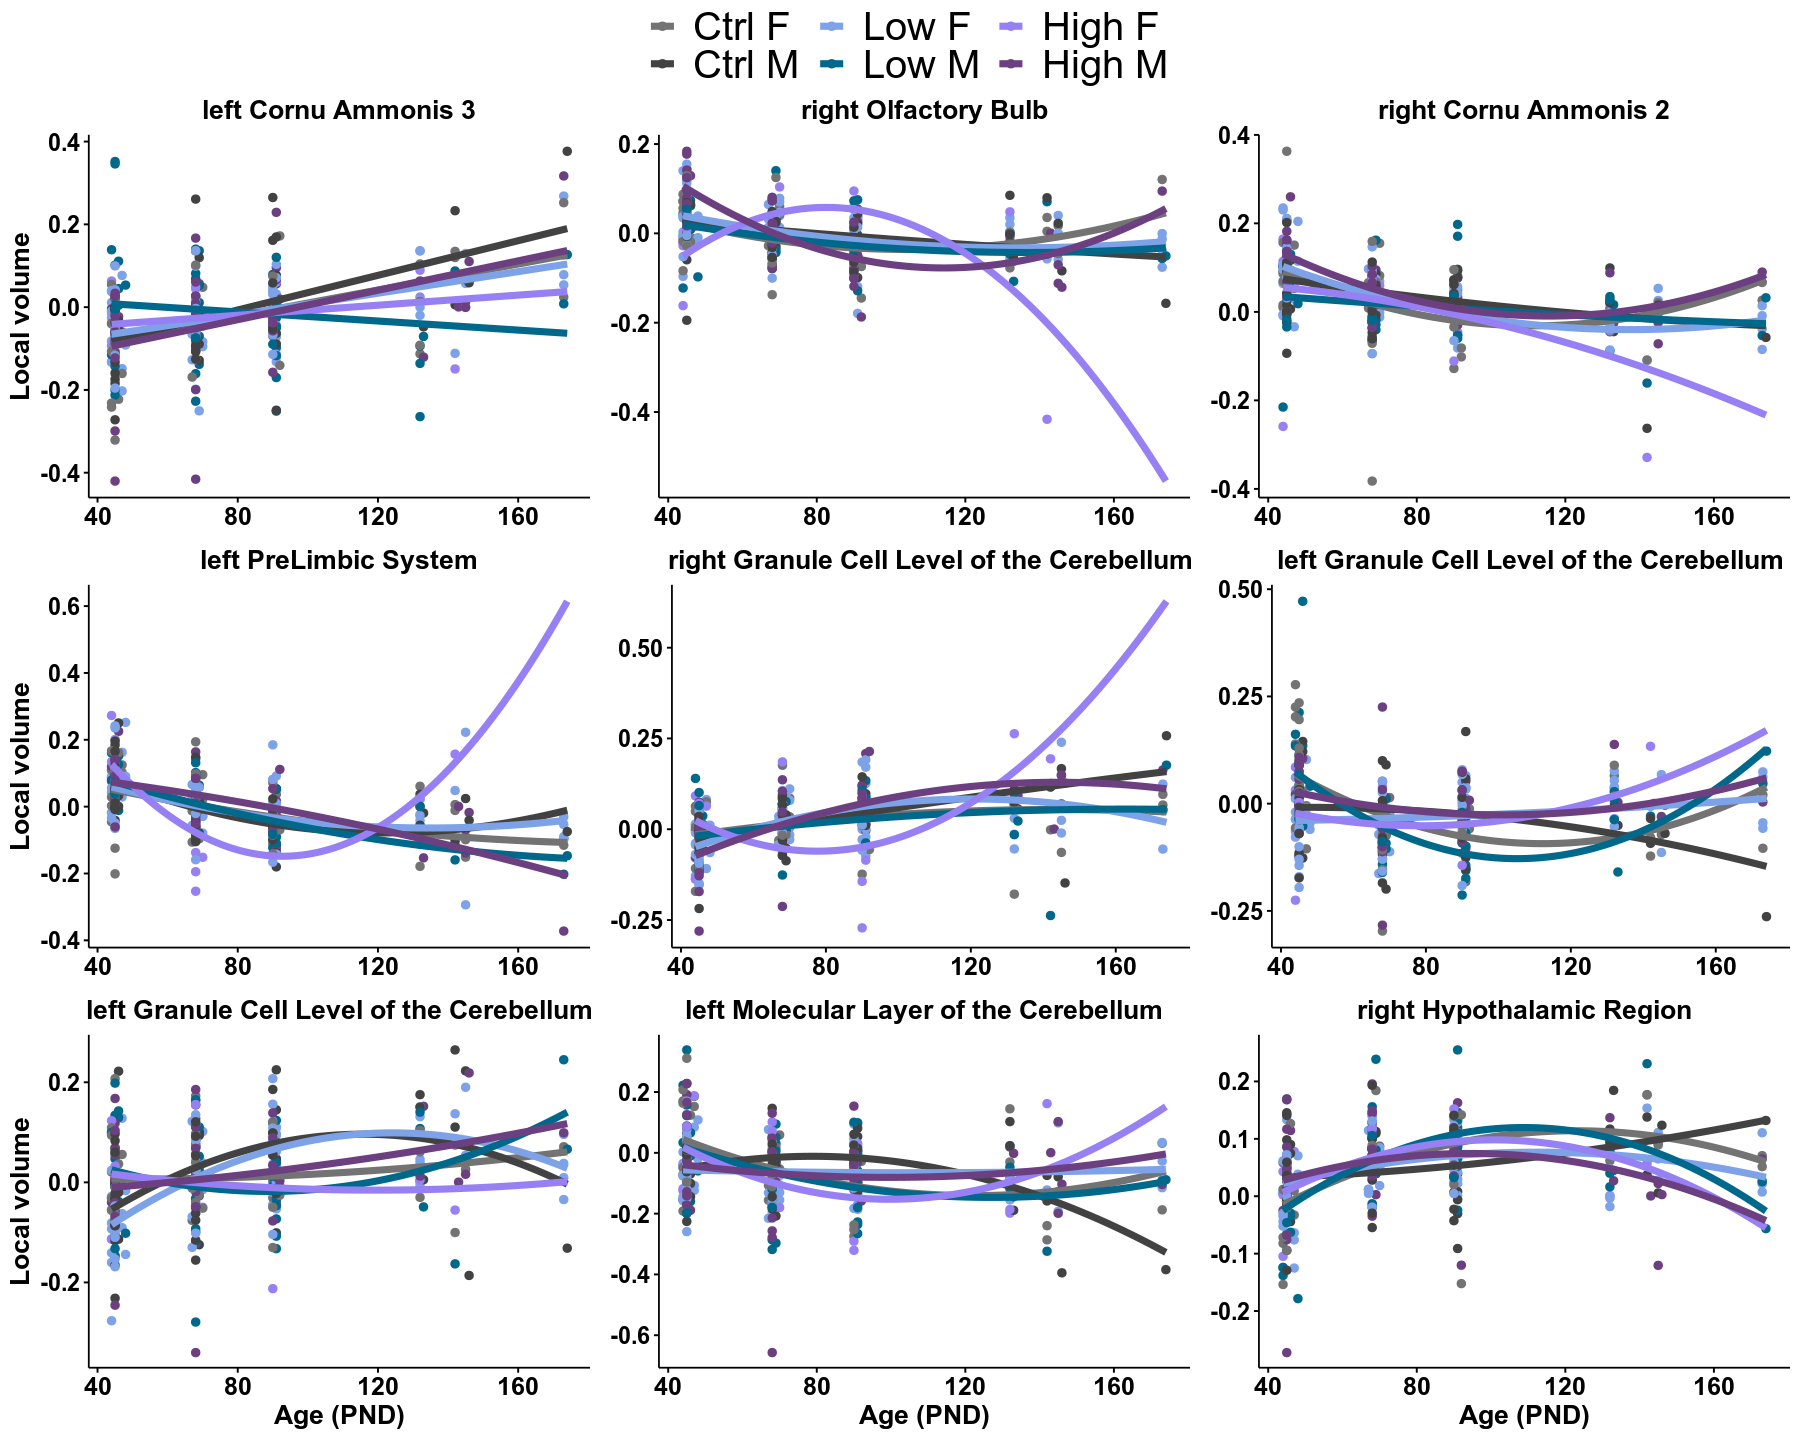

In [40]:
suppressMessages(
plots_model4_2 <- ggarrange(ggplot() + theme_void(),as_ggplot(M4_legend),ggplot() + theme_void(),
          plots_ROIs_Intake_sex_L[[rois_names_L[10]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_Intake_sex[[rois_names_P[1]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_sex[[rois_names_P[2]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_sex[[rois_names_P[3]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_Intake_sex[[rois_names_P[4]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_sex[[rois_names_P[5]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_sex[[rois_names_P[6]]],
          plots_ROIs_Intake_sex[[rois_names_P[7]]] + theme(axis.title.y = element_blank()),
          plots_ROIs_Intake_sex[[rois_names_P[8]]] + theme(axis.title.y = element_blank()),
          ncol = 3, nrow = 4, heights = c(0.2,1,1,1), 
                            font.label=list(color="black",size=22,face="bold", family = "Times New Roman"))
    )
plots_model4_2

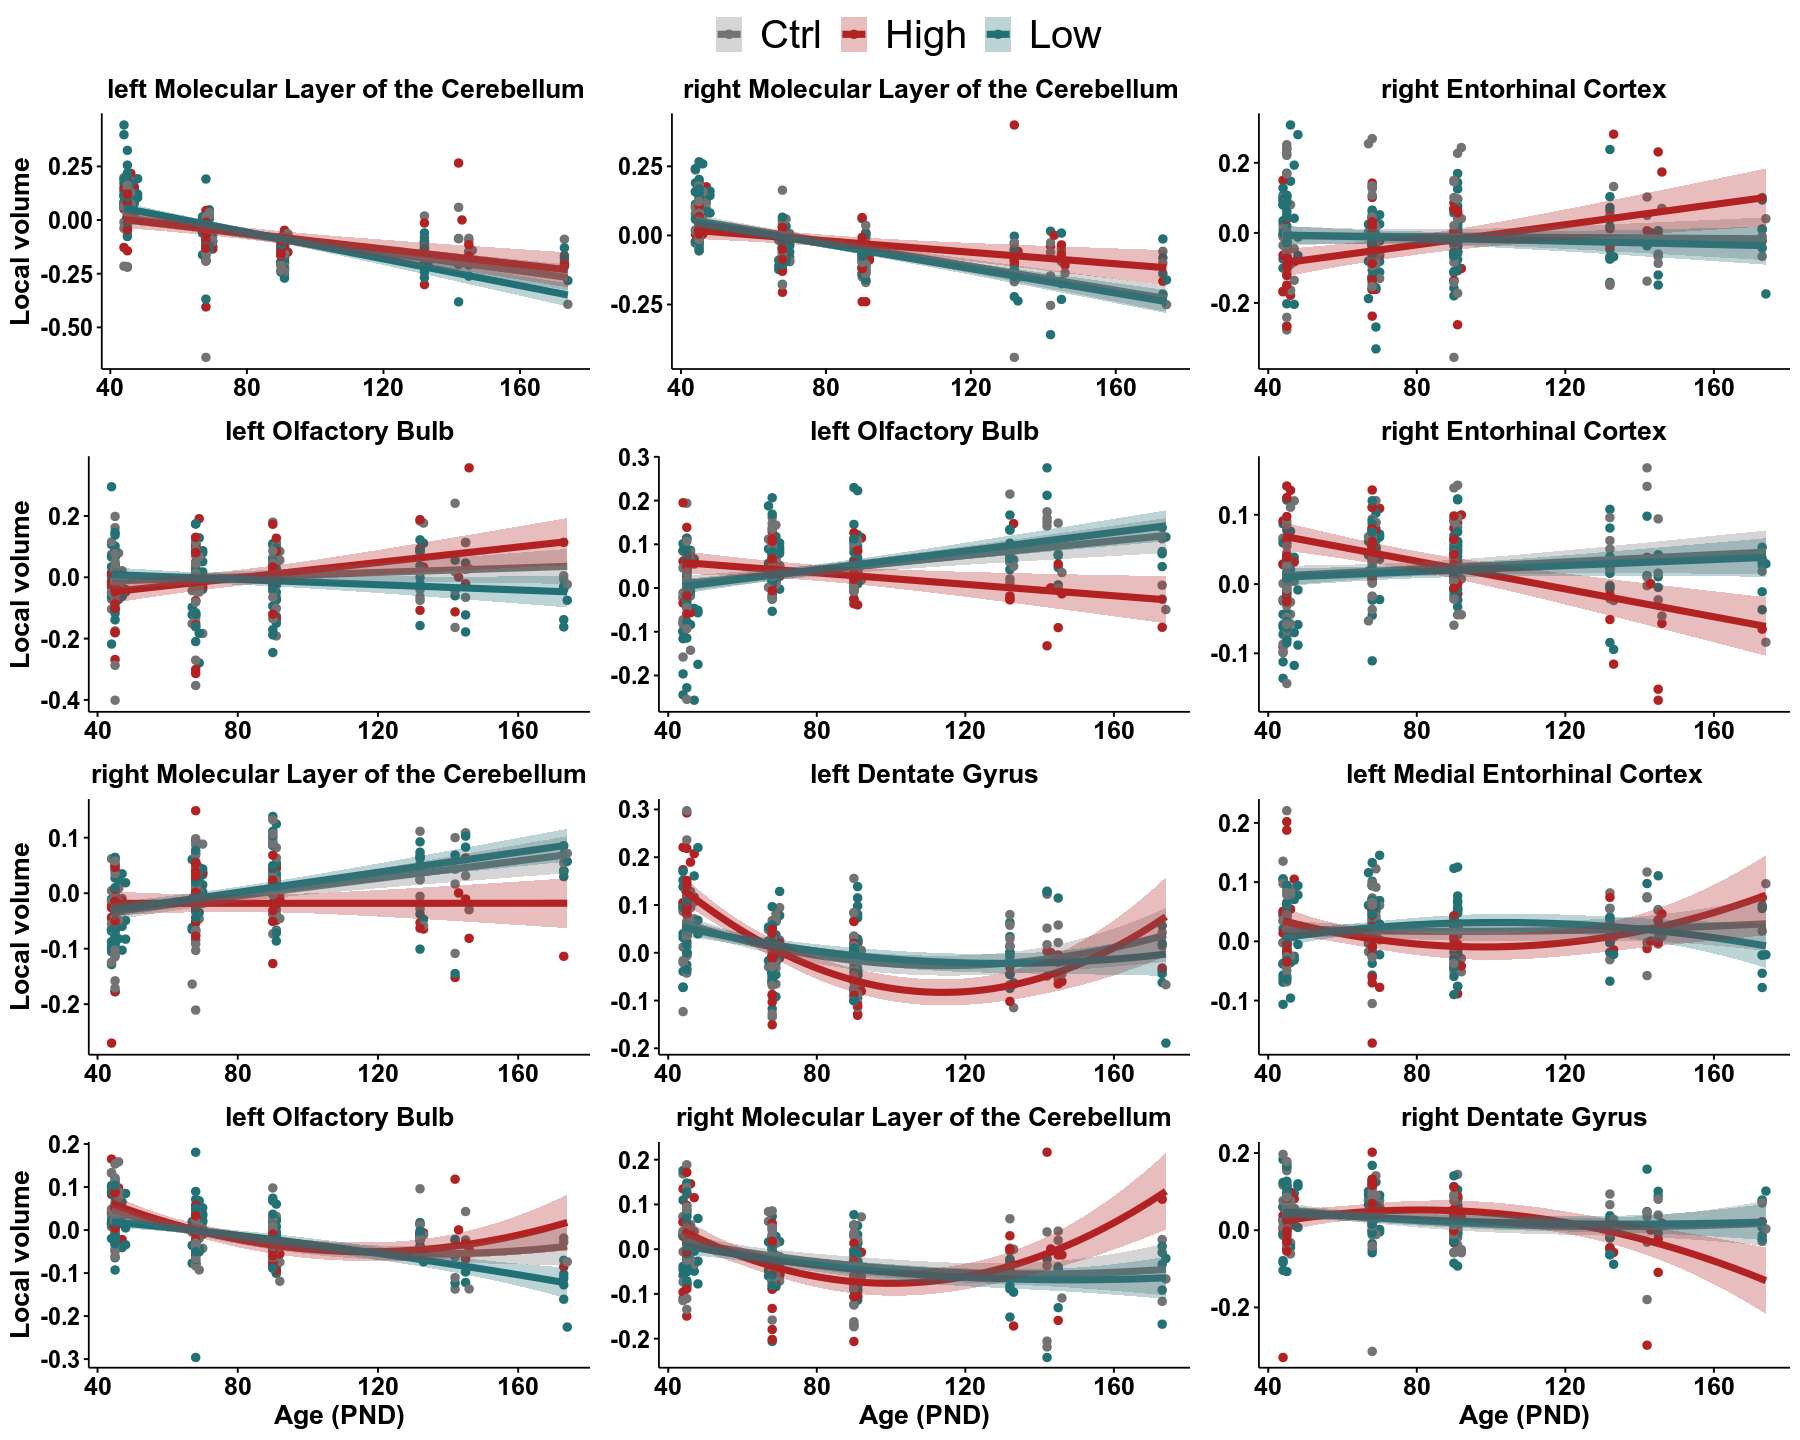

In [41]:
mod = "Lmod5"
rois_names_L <- str_subset(names(plots_ROIs),pattern = mod)

mod = "Pmod5"
rois_names_P <- str_subset(names(plots_ROIs),pattern = mod)

suppressMessages(
plots_model5 <- ggarrange(ggplot() + theme_void(),as_ggplot(M2_legend),ggplot() + theme_void(),
          plots_ROIs_Intake_L[[rois_names_L[1]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[2]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[3]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[4]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[5]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[6]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_L[[rois_names_L[7]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_Intake[[rois_names_P[1]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake[[rois_names_P[2]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake[[rois_names_P[3]]],
          plots_ROIs_Intake[[rois_names_P[4]]] + theme(axis.title.y = element_blank()),
          plots_ROIs_Intake[[rois_names_P[5]]] + theme(axis.title.y = element_blank()),
          ncol = 3, nrow = 5, heights = c(0.2,1,1,1,1), font.label=list(color="black",size=22,face="bold", family = "Times New Roman"))
    )
plots_model5

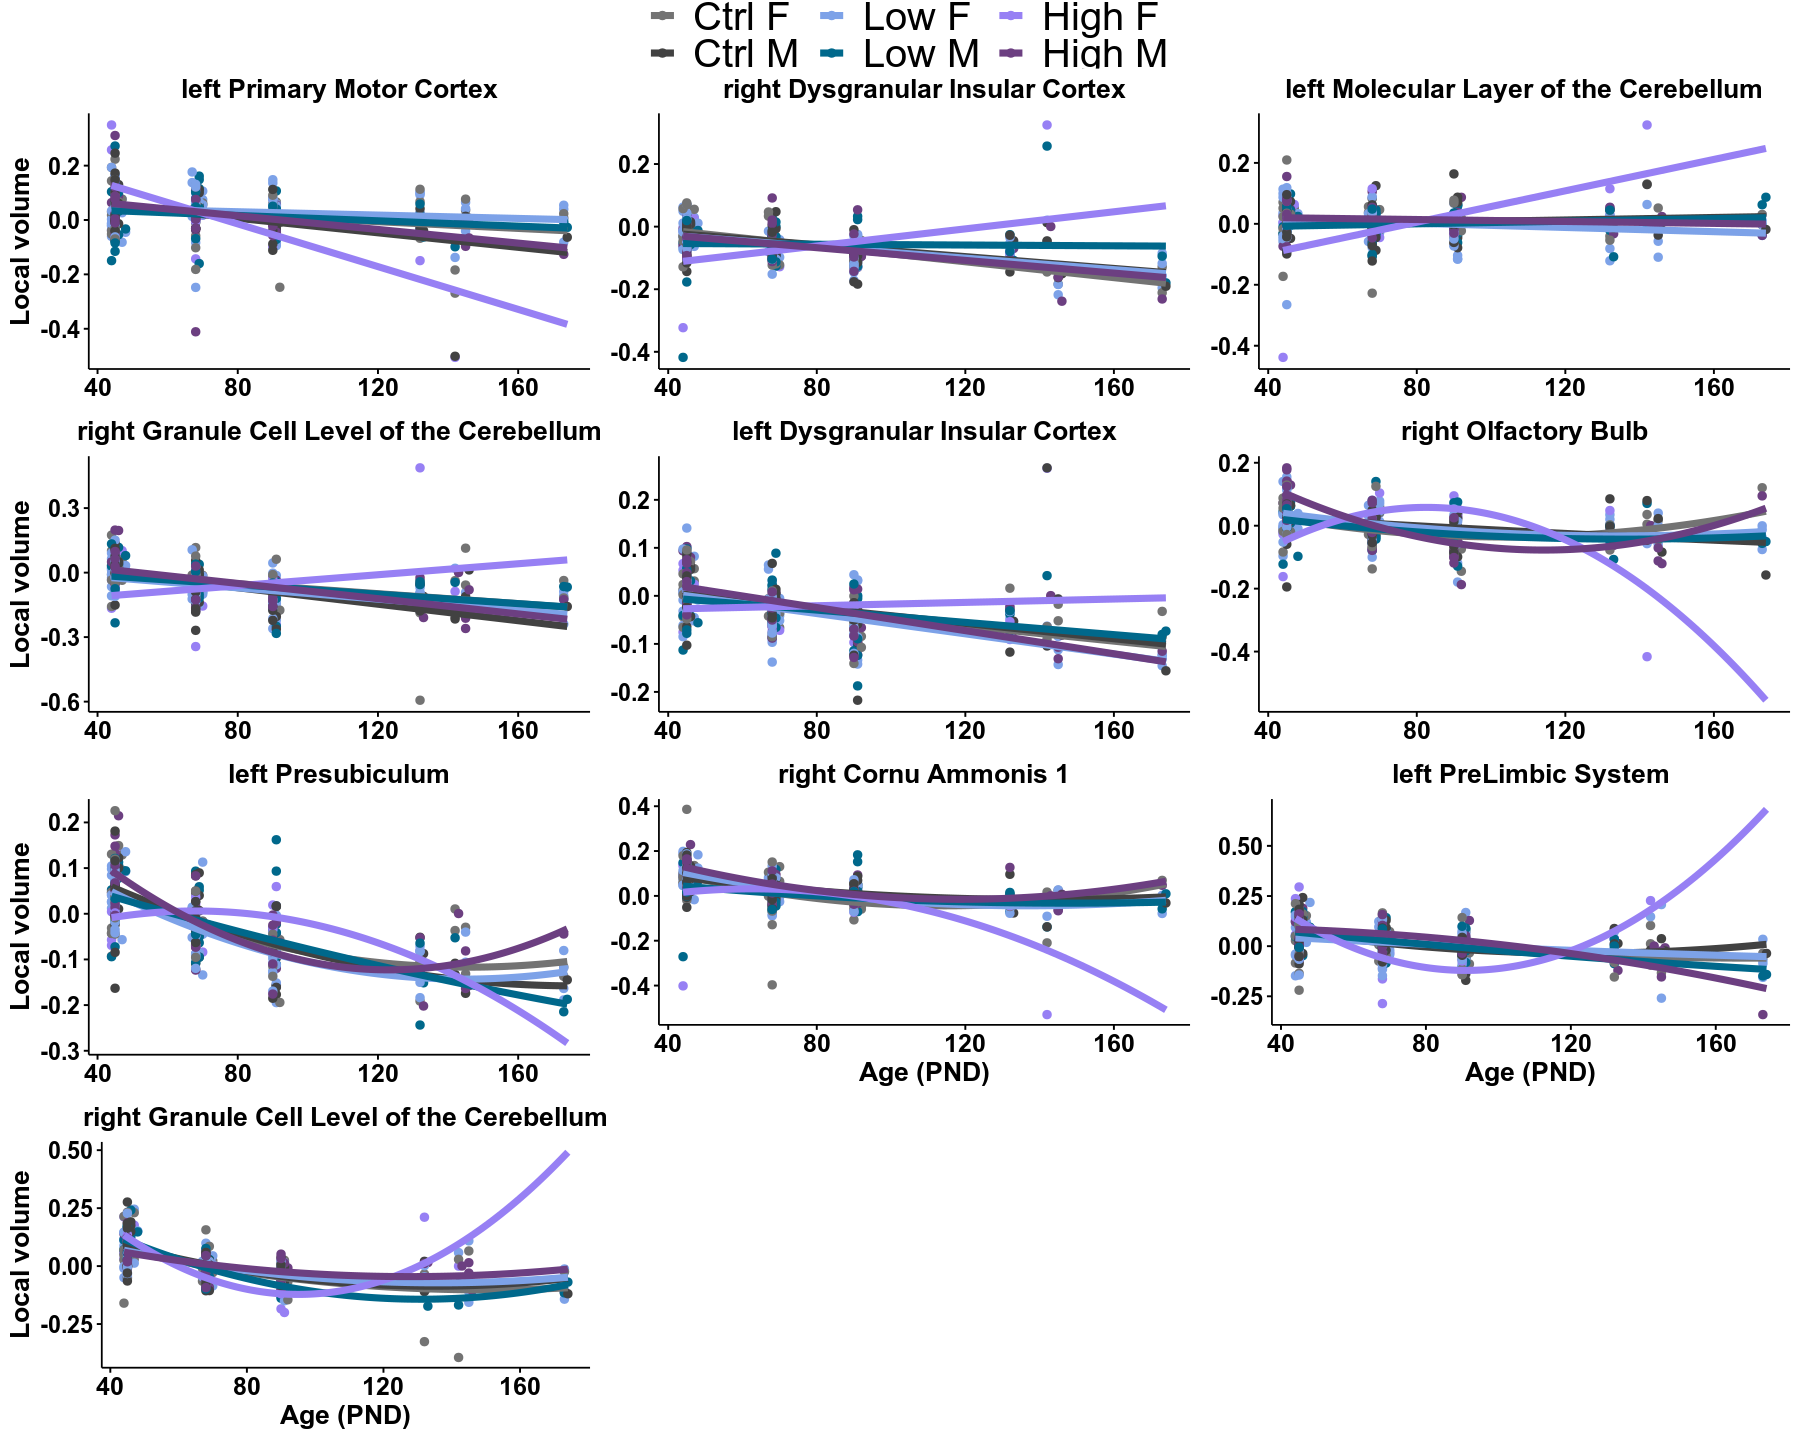

In [42]:
mod = "Lmod6"
rois_names_L <- str_subset(names(plots_ROIs),pattern = mod)

mod = "Pmod6"
rois_names_P <- str_subset(names(plots_ROIs),pattern = mod)

suppressMessages(
plots_model6 <- ggarrange(ggplot() + theme_void(),as_ggplot(M4_legend),ggplot() + theme_void(),
          plots_ROIs_Intake_sex_L[[rois_names_L[1]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_Intake_sex_L[[rois_names_L[2]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_sex_L[[rois_names_L[3]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_sex_L[[rois_names_L[4]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_Intake_sex_L[[rois_names_L[5]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_sex[[rois_names_P[1]]] + theme(axis.title.y = element_blank(),axis.title.x = element_blank()),
          plots_ROIs_Intake_sex[[rois_names_P[2]]] + theme(axis.title.x = element_blank()),
          plots_ROIs_Intake_sex[[rois_names_P[3]]] + theme(axis.title.y = element_blank()),
          plots_ROIs_Intake_sex[[rois_names_P[4]]] + theme(axis.title.y = element_blank()),
          plots_ROIs_Intake_sex[[rois_names_P[5]]],
          ncol = 3, nrow = 5, heights = c(0.25,1,1,1,1), 
                            font.label=list(color="black",size=22,face="bold", family = "Times New Roman"))
    )
plots_model6

## **2 Contrasts**

In [7]:
names_Lmod1 <- str_subset(colnames(Jdata_jacobians),pattern = "Lmod1")

Lmod1 <- names_Lmod1 %>% map(~ lmer(eval(paste0(.x," ~ Age*Group + Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Lmod1)
Residuals_Lmod1 <- Lmod1 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Lmod1 <- Lmod1 %>%
    map(~ contrast(emmeans(.x,~ Group), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod1)
    )))

Contrast_Lmod1 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



named list()

In [8]:
names_Lmod2 <- str_subset(colnames(Jdata_jacobians),pattern = "Lmod2")

Lmod2 <- names_Lmod2 %>% map(~ lmer(eval(paste0(.x," ~ Age*Intake + Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Lmod2)
Residuals_Lmod2 <- Lmod2 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Lmod2 <- Lmod2 %>%
    map(~ contrast(emmeans(.x,~ Intake), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod2)
    )))

Contrast_Lmod2 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



named list()

In [9]:
names_Pmod2 <- str_subset(colnames(Jdata_jacobians),pattern = "Pmod2")

Pmod2 <- names_Pmod2 %>% map(~ lmer(eval(paste0(.x," ~ Age*Intake + Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Pmod2)
Residuals_Pmod2 <- Pmod2 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Pmod2 <- Pmod2 %>%
    map(~ contrast(emmeans(.x,~ Intake), method = "pairwise", adjust = "fdr")) %>% set_names(names_Pmod2)
    )))

Contrast_Pmod2 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



named list()

In [10]:
names_Lmod3 <- str_subset(colnames(Jdata_jacobians),pattern = "Lmod3")

Lmod3 <-  names_Lmod3 %>% map(~ lmer(eval(paste0(.x," ~ Age*Group*Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Lmod3)
Residuals_Lmod3 <- Lmod3 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Lmod3 <- Lmod3 %>%
    map(~ contrast(emmeans(.x,~ Group*Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod3)
    )))


Contrast_Lmod3 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')



named list()

In [11]:
names_Pmod3 <- str_subset(colnames(Jdata_jacobians),pattern = "Lmod3")

suppressMessages(invisible(capture.output(
Pmod3 <- names_Pmod3 %>% map(~ lmer(eval(paste0(.x," ~ poly(Age,2)*Group*Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Pmod3)
        )))
Residuals_Pmod3 <- Pmod3 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Pmod3 <- Pmod3 %>%
    map(~ contrast(emmeans(.x,~ Group*Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Pmod3)
    )))

Contrast_Pmod3 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

$right_molecular_layer_of_the_cerebellum_Lmod3_peaks
# A tibble: 1 × 6
  contrast              estimate      SE    df t.ratio p.value
  <chr>                    <dbl>   <dbl> <dbl>   <dbl>   <dbl>
1 Alc female - Alc male   0.0228 0.00829  175.    2.75  0.0390

In [ ]:
names_Lmod4 <- str_subset(colnames(Jdata_jacobians),pattern = "Lmod4")

Lmod4 <- names_Lmod4 %>% map(~ lmer(eval(paste0(.x," ~ Age*Intake*Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Lmod4)
Residuals_Lmod4 <- Lmod4 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Lmod4 <- Lmod4 %>%
    map(~ contrast(emmeans(.x,~ Intake*Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod4)
    )))

Contrast_Lmod4 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

In [13]:
names_Pmod4 <- str_subset(colnames(Jdata_jacobians),pattern = "Pmod4")

suppressMessages(invisible(capture.output(
Pmod4 <- names_Pmod4 %>% map(~ lmer(eval(paste0(.x," ~ poly(Age,2)*Intake*Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Pmod4) 
    )))
Residuals_Pmod4 <- Pmod4 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Pmod4 <- Pmod4 %>%
    map(~ contrast(emmeans(.x,~ Intake*Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Pmod4)
    )))

Contrast_Pmod4 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1) 

$right_olfactory_bulb_Pmod4H_peaks
# A tibble: 4 × 6
  contrast                  estimate     SE    df t.ratio p.value
  <chr>                        <dbl>  <dbl> <dbl>   <dbl>   <dbl>
1 Ctrl female - High female  -0.0804 0.0236  172.   -3.41 0.00608
2 High female - Low female    0.0605 0.0224  170.    2.70 0.0289 
3 High female - High male     0.0839 0.0240  176.    3.49 0.00608
4 High female - Low male      0.0739 0.0235  169.    3.15 0.00970

$left_pre_limbic_system_left_Pmod4H_peaks
# A tibble: 5 × 6
  contrast                  estimate     SE    df t.ratio  p.value
  <chr>                        <dbl>  <dbl> <dbl>   <dbl>    <dbl>
1 Ctrl female - High female   0.110  0.0321  172.    3.44 0.00363 
2 High female - Low female   -0.107  0.0305  170.   -3.50 0.00363 
3 High female - Ctrl male    -0.0936 0.0321  175.   -2.91 0.0122  
4 High female - High male    -0.141  0.0327  176.   -4.31 0.000399
5 High female - Low male     -0.107  0.0319  169.   -3.36 0.00363 

$right_granule_cell_level_of_the_cerebellum_Pmod4H_peaks
# A tibble: 5 × 6
  contrast                  estimate     SE    df t.ratio p.value
  <chr>                        <dbl>  <dbl> <dbl>   <dbl>   <dbl>
1 Ctrl female - High female   0.0841 0.0298  172.    2.82 0.0200 
2 High female - Low female   -0.102  0.0283  170.   -3.61 0.00602
3 High female - Ctrl male    -0.0857 0.0299  175.   -2.87 0.0200 
4 High female - High male    -0.101  0.0304  176.   -3.31 0.00842
5 High female - Low male     -0.0776 0.0296  169.   -2.62 0.0289 

$left_granule_cell_level_of_the_cerebellum_left_Pmod4L_peaks
# A tibble: 3 × 6
  contrast              estimate     SE    df t.ratio p.value
  <chr>                    <dbl>  <dbl> <dbl>   <dbl>   <dbl>
1 Low female - Low male   0.0553 0.0191  162.    2.89  0.0216
2 Ctrl male - Low male    0.0706 0.0221  173.    3.20  0.0216
3 High male - Low male    0.0701 0.0232  175.    3.02  0.0216

In [ ]:
names_Lmod5 <- str_subset(colnames(Jdata_jacobians),pattern = "Lmod5")

Lmod5 <- names_Lmod5 %>% map(~ lmer(eval(paste0(.x," ~ Age*Intake + Sex + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Lmod5)
Residuals_Lmod5 <- Lmod5 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Lmod5 <- Lmod5 %>%
    map(~ contrast(emmeans(.x,~ Intake), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod5)
    )))

Contrast_Lmod5 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1) 

In [15]:
names_Pmod5 <- str_subset(colnames(Jdata_jacobians),pattern = "Pmod5")

suppressMessages(invisible(capture.output(
Pmod5 <- names_Pmod5 %>% map(~ lmer(eval(paste0(.x," ~ poly(Age,2)*Intake + Sex + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Pmod5)
        )))
Residuals_Pmod5 <- Pmod5 %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Pmod5 <- Pmod5 %>%
    map(~ contrast(emmeans(.x,~ Intake), method = "pairwise", adjust = "fdr")) %>% set_names(names_Pmod5)
    )))

Contrast_Pmod5 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1) 

$left_medial_entorhinal_cortex_left_Pmod5_peaks
# A tibble: 1 × 6
  contrast   estimate     SE    df t.ratio p.value
  <chr>         <dbl>  <dbl> <dbl>   <dbl>   <dbl>
1 High - Low  -0.0303 0.0110  174.   -2.75  0.0200

In [ ]:
names_Lmod6 <- str_subset(colnames(Jdata_jacobians),pattern = "Lmod6")

Lmod6 <- names_Lmod6 %>% map(~ lmer(eval(paste0(.x," ~ Age*Intake*Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Lmod6)
Residuals_Lmod6 <- Lmod6 %>% map_dfc(~ .x %>% residuals())                                                                                                                                      
                                                                                                                                      
suppressMessages(invisible(capture.output(
Contrast_Lmod6 <- Lmod6 %>%
    map(~ contrast(emmeans(.x,~ Intake*Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Lmod6)
    )))

Contrast_Lmod6 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

In [17]:
names_Pmod6 <- str_subset(colnames(Jdata_jacobians),pattern = "Pmod6")

suppressMessages(invisible(capture.output(
Pmod6 <- names_Pmod6 %>% map(~ lmer(eval(paste0(.x," ~ poly(Age,2)*Intake*Sex  + Batch + (1 |RID)")), data = Jdata_jacobians) ) %>% set_names(names_Pmod6)
    )))
Residuals_Pmod6 <- Pmod6 %>% map_dfc(~ .x %>% residuals())  

suppressMessages(invisible(capture.output(
Contrast_Pmod6 <- Pmod6 %>%
    map(~ contrast(emmeans(.x,~ Intake*Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Pmod6)
    )))

Contrast_Pmod6 %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

$right_olfactory_bulb_Pmod6_peaks
# A tibble: 4 × 6
  contrast                  estimate     SE    df t.ratio p.value
  <chr>                        <dbl>  <dbl> <dbl>   <dbl>   <dbl>
1 Ctrl female - High female  -0.0804 0.0236  172.   -3.41 0.00608
2 High female - Low female    0.0605 0.0224  170.    2.70 0.0289 
3 High female - High male     0.0839 0.0240  176.    3.49 0.00608
4 High female - Low male      0.0739 0.0235  169.    3.15 0.00970

$left_pre_limbic_system_left_Pmod6_peaks
# A tibble: 5 × 6
  contrast                  estimate     SE    df t.ratio  p.value
  <chr>                        <dbl>  <dbl> <dbl>   <dbl>    <dbl>
1 Ctrl female - High female   0.106  0.0335  172.    3.15 0.00718 
2 High female - Low female   -0.111  0.0318  170.   -3.49 0.00454 
3 High female - Ctrl male    -0.0994 0.0336  175.   -2.96 0.0105  
4 High female - High male    -0.148  0.0341  176.   -4.34 0.000361
5 High female - Low male     -0.112  0.0333  169.   -3.38 0.00454 

$right_granule_cell_level_of_the_cerebellum_Pmod6_peaks
# A tibble: 4 × 6
  contrast                  estimate     SE    df t.ratio p.value
  <chr>                        <dbl>  <dbl> <dbl>   <dbl>   <dbl>
1 Ctrl female - High female   0.0695 0.0275  172.    2.52  0.0468
2 High female - Low female   -0.0766 0.0262  170.   -2.93  0.0290
3 High female - Ctrl male    -0.0750 0.0276  175.   -2.72  0.0361
4 High female - High male    -0.0847 0.0280  176.   -3.02  0.0290

### **Adding exvivo volumes**

In [ ]:
Jdata_jacobiansEx <- read_csv("Data/MRI/DBM_exvivo/Jdata_jacobians.csv")

#### **Fitting model of exvivo's**

In [19]:
names_Pmod4_ex <- str_subset(colnames(Jdata_jacobiansEx),pattern = "Pmod4")

suppressMessages(invisible(capture.output(
Pmod4_ex <- names_Pmod4_ex %>% map(~ lm(eval(paste0(.x," ~ Intake*Sex  + Batch")), data = Jdata_jacobiansEx) ) %>% set_names(names_Pmod4_ex) 
    )))
Residuals_Pmod4_ex <- Pmod4_ex %>% map_dfc(~ .x %>% residuals())

suppressMessages(invisible(capture.output(
Contrast_Pmod4_ex <- Pmod4_ex %>%
    map(~ contrast(emmeans(.x,~ Intake*Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Pmod4_ex)
    )))

Contrast_Pmod4_ex %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1) 

named list()

In [20]:
names_Pmod6_ex <- str_subset(colnames(Jdata_jacobiansEx),pattern = "Pmod6")

suppressMessages(invisible(capture.output(
Pmod6_ex <- names_Pmod6_ex %>% map(~ lm(eval(paste0(.x," ~ Intake*Sex  + Batch")), data = Jdata_jacobiansEx) ) %>% set_names(names_Pmod6_ex)
    )))
Residuals_Pmod6_ex <- Pmod6_ex %>% map_dfc(~ .x %>% residuals())  

suppressMessages(invisible(capture.output(
Contrast_Pmod6_ex <- Pmod6_ex %>%
    map(~ contrast(emmeans(.x,~ Intake*Sex), method = "pairwise", adjust = "fdr")) %>% set_names(names_Pmod6_ex)
    )))

Contrast_Pmod6_ex %>% map(~ .x %>% as_tibble() %>% filter(p.value <= 0.05)) %>% compact(1)

named list()

### **Plotting only significative Models**

In [21]:
Jdata_jacobians <- Jdata_jacobians %>% 
                          mutate(Group_sex = case_when(Group == "Alc" & Sex == "female" ~ "Alc F",
                                                Group == "Alc" & Sex == "male" ~ "Alc M",
                                                Group == "Ctrl" & Sex == "female" ~ "Ctrl F",
                                                Group == "Ctrl" & Sex == "male" ~ "Ctrl M"),
                          Intake_sex = case_when(Intake == "High" & Sex == "female" ~ "High F",
                                                 Intake == "High" & Sex == "male" ~ "High M",
                                                 Intake == "Low" & Sex == "female" ~ "Low F",
                                                 Intake == "Low" & Sex == "male" ~ "Low M",
                                                 Intake == "Ctrl" & Sex == "female" ~ "Ctrl F",
                                                 Intake == "Ctrl" & Sex == "male" ~ "Ctrl M"), .before = 8) %>%
                          mutate(Group_sex = factor(Group_sex, levels = c("Ctrl F","Ctrl M","Alc F","Alc M") ),
                                 Intake_sex = factor(Intake_sex, levels = c("Ctrl F","Ctrl M","Low F","Low M","High F","High M")) )

Residuals_exvivo <- Jdata_jacobiansEx[1:8] %>% add_column(Residuals_Pmod4_ex,Residuals_Pmod6_ex,tibble(vivo=rep("exvivo",nrow(Jdata_jacobiansEx)))) %>% 
                          mutate(Group_sex = case_when(Group == "Alc" & Sex == "female" ~ "Alc F",
                                                Group == "Alc" & Sex == "male" ~ "Alc M",
                                                Group == "Ctrl" & Sex == "female" ~ "Ctrl F",
                                                Group == "Ctrl" & Sex == "male" ~ "Ctrl M"),
                          Intake_sex = case_when(Intake == "High" & Sex == "female" ~ "High F",
                                                 Intake == "High" & Sex == "male" ~ "High M",
                                                 Intake == "Low" & Sex == "female" ~ "Low F",
                                                 Intake == "Low" & Sex == "male" ~ "Low M",
                                                 Intake == "Ctrl" & Sex == "female" ~ "Ctrl F",
                                                 Intake == "Ctrl" & Sex == "male" ~ "Ctrl M"), .before = 8) %>%
                          mutate(Group_sex = factor(Group_sex, levels = c("Ctrl F","Ctrl M","Alc F","Alc M") ),
                                 Intake_sex = factor(Intake_sex, levels = c("Ctrl F","Ctrl M","Low F","Low M","High F","High M")) )
#Jdata_jacobians_residuals <- Jdata_jacobians[1:10] %>% add_column(Residuals_Pmod4,Residuals_Pmod6,tibble(vivo=rep("invivo",nrow(Jdata_jacobians)))) %>% rbind(Residuals_exvivo)
Jdata_jacobians_residuals <- Jdata_jacobians[1:10] %>% add_column(Residuals_Pmod4,Residuals_Pmod6,tibble(vivo=rep("invivo",nrow(Jdata_jacobians))))


In [28]:
nROI <- Jdata_jacobians_residuals[11:(length(Jdata_jacobians_residuals)-1)] %>% colnames()

In [23]:
pal_group <- c("#737373","#B22222","#217175")
pal_sex <- c(alpha("#8d289f",1),alpha("#28799f",1))
pal_groupSex <- c("#737373","#424242","#008B8B","#8B475D")
pal_IntakeSex <- c("#737373","#424242","#7DA2E8","#00688B","#9780F4","#6C3F81")

In [ ]:
ROIs <- read_csv("Data/MRI/DBM/ROIs.csv")

In [ ]:
plots_ROIs_Intake_sex_res <- NULL
for (i in 1:length(nROI)) {
  ROI <- nROI[i]
  plots_ROIs_Intake_sex_res[[ROI]] <- ggscatter(Jdata_jacobians_residuals,
                  x = "Age", y = ROI, group = "Intake_sex",
                  #add = c("loess"), conf.int = TRUE,
                  color = "Intake_sex", linewidth =2, #shape = "vivo",
                  palette = pal_IntakeSex,
                  add.params = list(size = 2, alpha = 0.5),
                  plot_type ="b",
                  title = gsub('_left','',ROIs$label[i]),
                  xlab = "Age (PND)",
                  ylab = "Corr. relative volume",
                  font.x = c(16,"bold"),
                  font.y = c(16,"bold"),
                  font.tickslab = c(14,"bold")) +
        scale_shape_manual(values = c(18, 16)) +
        geom_line(data = as_tibble(Effect(c("Intake_sex", "Age"),
                                          lmer(get(ROI) ~ poly(Age,2)*Intake_sex + Batch + (1 |RID), data = Jdata_jacobians),
                                          xlevels=list(Age=seq(min(Jdata_jacobians$Age),
                                                               max(Jdata_jacobians$Age),1)))),
                  aes(y=fit, color = Intake_sex), size=2) +
        theme(legend.position = "none",
              plot.title = element_text(hjust = 0.5,size = 16, face = "bold")) +
         theme(text = element_text(size=20), axis.text.x = element_text(size=15))
}

In [39]:
#Plot only the significant ones
Model4_plots <- c(1,3,4,5) %>% 
                map(~ plots_ROIs_Intake_sex_res[[str_subset(nROI,pattern = "Pmod4")[.x]]] %>% 
                            theme_phases_res(str_subset(nROI,pattern = "Pmod4"),.x) ) %>% 
                set_names(str_subset(nROI,pattern = "Pmod4") %>% .[c(1,3,4,5)])

Model6_plots <- c(1,4,5) %>% map(~ plots_ROIs_Intake_sex_res[[str_subset(nROI,pattern = "Pmod6")[.x]]] %>% 
                            theme_phases_res(str_subset(nROI,pattern = "Pmod6"),.x) ) %>% 
                set_names(str_subset(nROI,pattern = "Pmod6") %>% .[c(1,4,5)])

## **Export Figures**

In [40]:
save(Residuals_Pmod4, Contrast_Pmod4, Residuals_Pmod6, Contrast_Pmod6, Model4_plots,Model6_plots,file = "Data/MRI_metrics.RData")

In [271]:
dir.create("Figures/DBM/Trayectories")

In [41]:
Model4_plots %>% names() %>% map(~ ggsave(plot = Model4_plots[[.x]], dpi=300,height = 7, width = 9,bg="white",
       filename = paste0("Figures/DBM/Trayectories/",.x,".png")) )

[[1]]
[1] "Figures/DBM/Trayectories/right_cornu_ammonis_2_Pmod4H_peaks.png"

[[2]]
[1] "Figures/DBM/Trayectories/right_granule_cell_level_of_the_cerebellum_Pmod4H_peaks.png"

[[3]]
[1] "Figures/DBM/Trayectories/left_granule_cell_level_of_the_cerebellum_left_2_Pmod4L_peaks.png"

[[4]]
[1] "Figures/DBM/Trayectories/right_hypothalamic_region_Pmod4L_peaks.png"

In [42]:
Model6_plots %>% names() %>% map(~ ggsave(plot = Model6_plots[[.x]], dpi=300,height = 7, width = 9,bg="white",
       filename = paste0("Figures/DBM/Trayectories/",.x,".png")) )

[[1]]
[1] "Figures/DBM/Trayectories/right_olfactory_bulb_Pmod6_peaks.png"

[[2]]
[1] "Figures/DBM/Trayectories/left_pre_limbic_system_left_Pmod6_peaks.png"

[[3]]
[1] "Figures/DBM/Trayectories/right_granule_cell_level_of_the_cerebellum_Pmod6_peaks.png"

In [ ]:
ggsave(plot = as_ggplot(M4_legend), dpi=300,height = 1, width = 4.5,bg="white",filename = "Figures/DBM/Trayectories/legend.png")

# **Network based statistics**

## **0 Running RABIES pipeline**

### **0.1 Creating atlas segmentation**


In [3]:
setwd("../")

In [ ]:
dir.create("code/Atlas/")

In [165]:
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/Atlas/code/* code/Atlas/",intern = T)

character(0)
attr(,"status")
[1] 1

In [166]:
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/code/* code/RABIES/",intern = T)

character(0)
attr(,"status")
[1] 1

In [ ]:
dir.create("Data/MRI/Atlas/")

In [7]:
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/Atlas/Mask_erode.nii.gz Data/MRI/Atlas/",
       intern = T)

system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/Atlas/ROI_fmri_mask.nii Data/MRI/Atlas/",
       intern = T)

character(0)
attr(,"status")
[1] 1

character(0)

After create ROI-specific atlas for DBM analysis, we're going to joining ROIs and erode each ROI

- Joining ROI by label in SIGMA   
bash [rois_mask_joining.sh](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/Atlas/rois_mask_joining.sh)

- Erode using FSL-toolbox   
bash [rois_mask_erode.sh](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/Atlas/rois_mask_erode.sh)

### **0.2 Running through HCP cluster**

To obtain the FC-matrices, we going to use RABIES pipeline to preprocessing, removing confounds noise and do the analysis.
[RABIES](https://rabies.readthedocs.io/en/latest/index.html) is an open source image processing pipeline for rodent fMRI.

RABIES is used through HCP cluster by a [singularity container](https://docs.sylabs.io/guides/3.5/user-guide/index.html). 
Scripts used:
- [Deoblique](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/RABIES/01_deoblique.sh): Prior to start with rabies, we need to correct the obliquing. 
- [Preprocessing](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/RABIES/02_preproc.sh): Atlas used to preprocessig step was [SIGMA v.1.2.1](https://www.nature.com/articles/s41467-019-13575-7). 

<div align="center">   
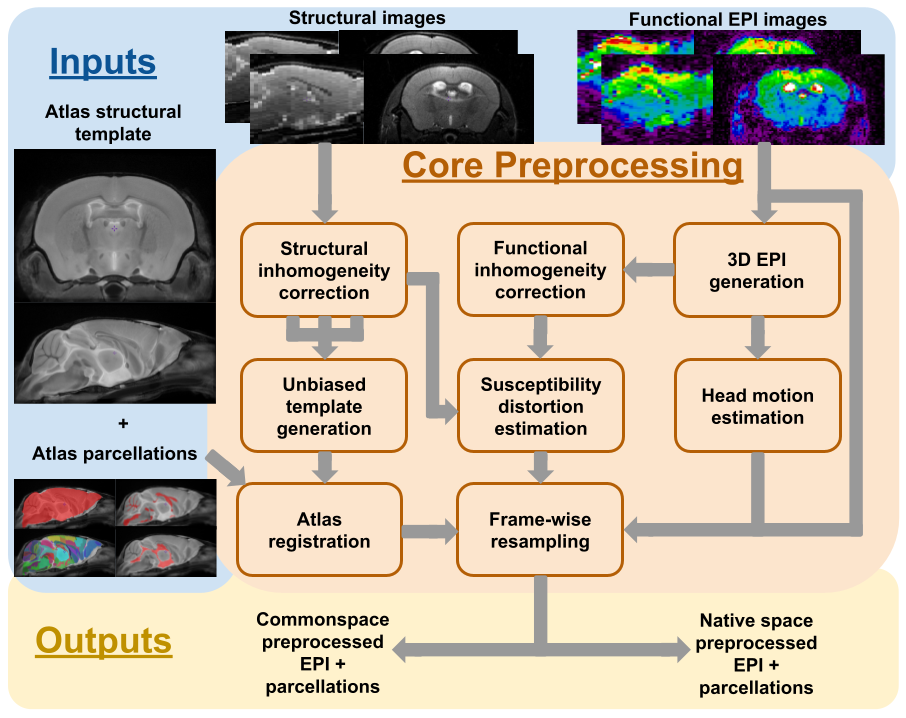
</div>

- [Confounding](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/RABIES/03_confound.sh): Using ICA 10-dim, and WM_signal CSF_signal mot_6

<div align="center">   
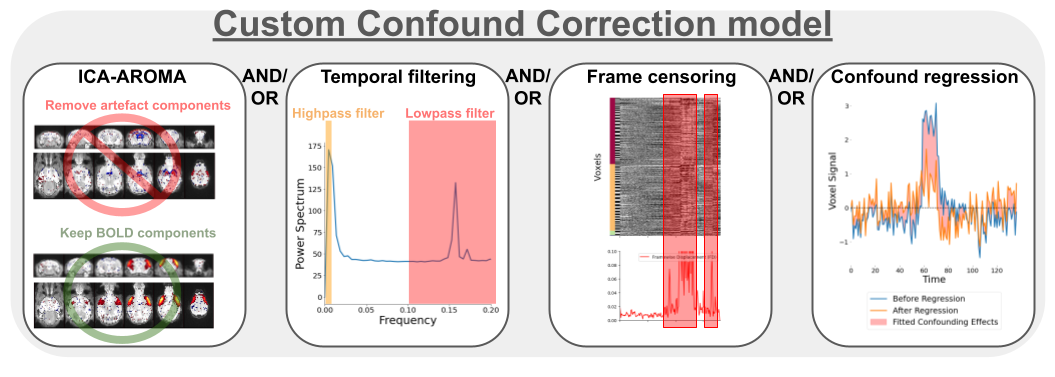
</div>

- [Analysis](https://github.com/psilantrolab/Sudmex-alcohol-rat/blob/main/code/RABIES/04_analysis.sh): 
    - ICA-based analyses: --group_ica based on FSL’s MELODIC ICA algorithm
    - Correlation-based analyses: --FC_matrix based on --ROI_type SIGMA labels

### **0.3 Quality control**
---

We need to verify the quality of RABIES processing or re-run the pipeline.

- Registration of structural to template

<div align="center"> 
    
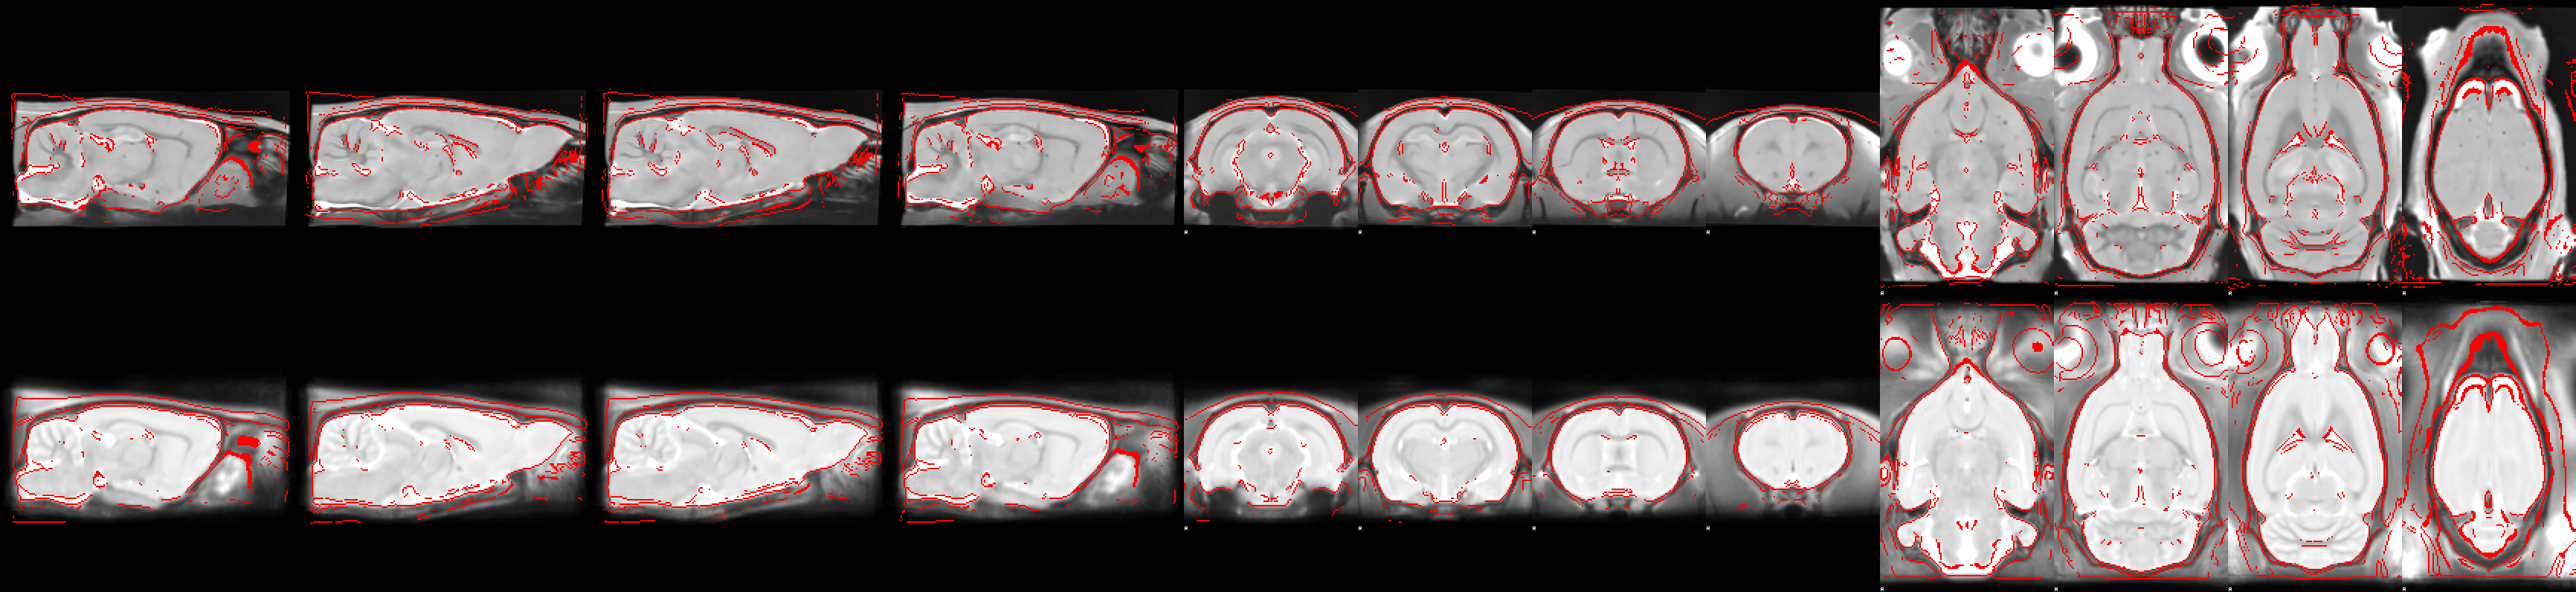

</div>

- Registration of functional to structural

<div align="center">   
    
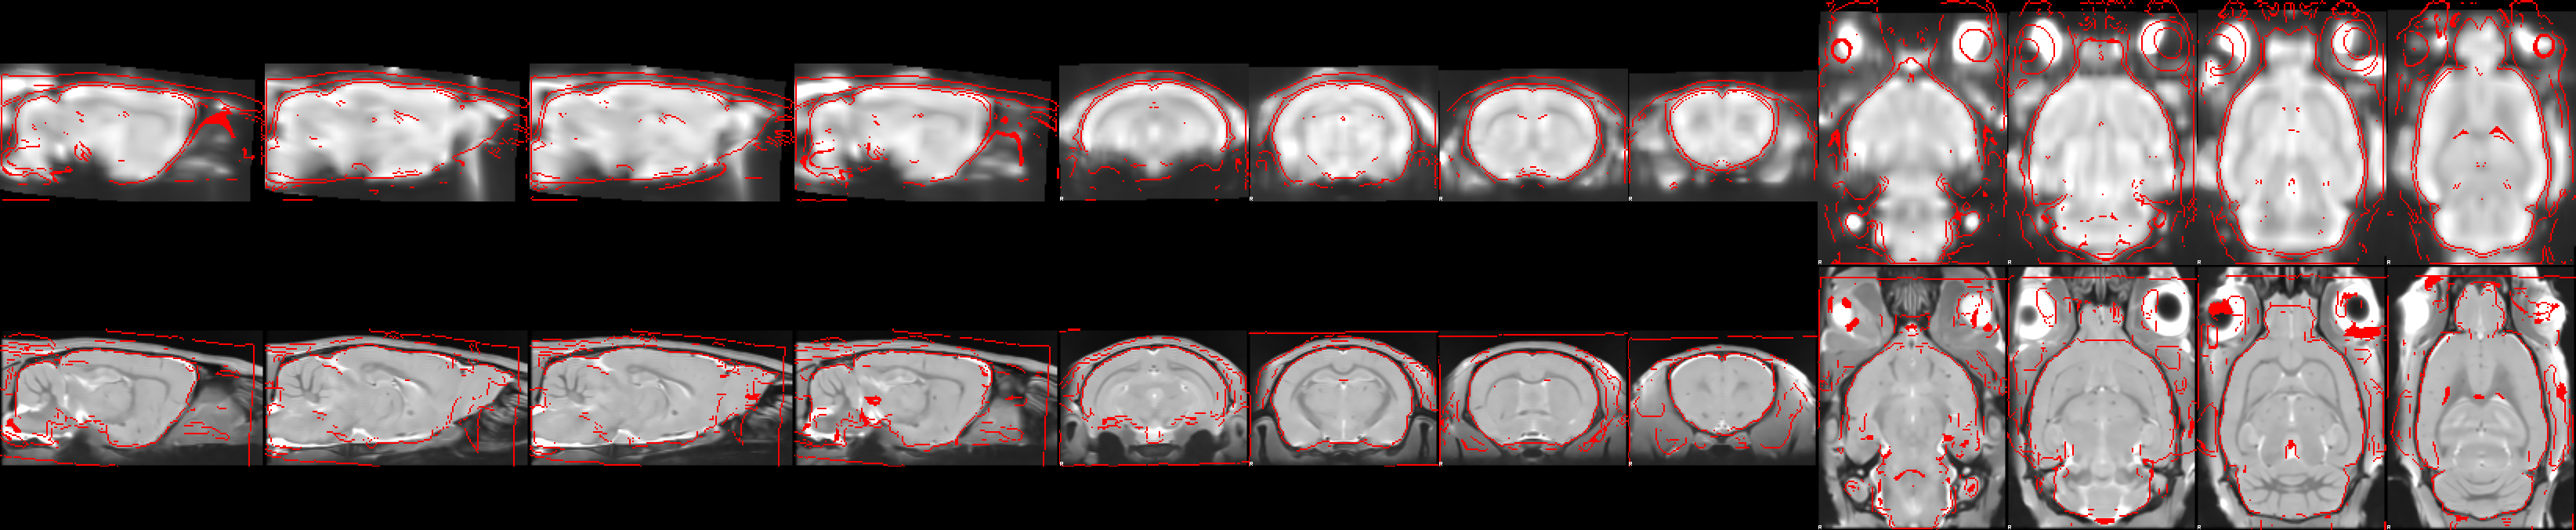
    
</div>

## **1. Data preparation**

Reading each matrix obtained by RABIES pipeline.
{RID}_ses-{session}_task-rest_run-01_bold_RAS_combined_cleaned_FC_matrix.csv

The output is labeled according to ROI-value (i.e. 11, 21, etc., for left hemisphere and 12, 22, etc., for right hemisphere). Using SIGMA atlas we're going to relabed the row/columns.


In [15]:
c(1,2,3,5) %>% map(~ dir.create(paste0("Data/MRI/FC-matrices/ses-T",.x,"/Alc"),recursive = T) )
c(1,2,3,5) %>% map(~ dir.create(paste0("Data/MRI/FC-matrices/ses-T",.x,"/Ctrl"),recursive = T) )

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

In [19]:
system("for i in {1,2,3,5}; do scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/rabies/analysisDR_out/Session-T${i}/Alc/analysis_main_wf/analysis_wf/_split_name_sub-*_ses-*_task-rest_run-01_bold/FC_matrix/*csv Data/MRI/FC-matrices/ses-T${i}/Alc/ ; done",
                   intern = T)

character(0)
attr(,"status")
[1] 1

In [48]:
system("for i in {1,2,3,5}; do scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/rabies/analysisDR_out/Session-T${i}/Ctrl/analysis_main_wf/analysis_wf/_split_name_sub-*_ses-*_task-rest_run-01_bold/FC_matrix/*csv Data/MRI/FC-matrices/ses-T${i}/Ctrl/ ; done",
                   intern = T)

character(0)
attr(,"status")
[1] 1

## Previous run (delete)

In [4]:
select_ROIs <- read_excel("Data/MRI/SIGMA_InVivo_Anatomical_Brain_Atlas_ListOfStructures_fmri.xlsx",sheet = 2) %>% 
               clean_names() %>% select(region_of_interest) %>% as_vector() %>% make_clean_names()

In [5]:
Structures <- seq(1,length(select_ROIs)) %>% 
                  map(~ c(paste0("l_",select_ROIs)[.x], paste0("r_",select_ROIs)[.x])) %>% 
                  unlist()

In [6]:
matrices_path <- list.files("Data/MRI/FC-matrices",pattern = "FC_matrix", recursive = T, full.names = T)

In [7]:
suppressMessages(invisible(capture.output(
matrices_files <- matrices_path %>% map(~ .x %>% read_csv(show_col_types = FALSE)) %>% 
       map(~ .x %>% select(-c("544","546")) %>% filter(...1 != c("544","546"))) %>% map(~ .x[-1] %>% set_colnames(Structures) %>% 
                                                                                           set_rownames(Structures))
    )))

In [8]:
new_paths <- matrices_path %>% str_replace(pattern = "FC-matrices", replacement = "fc-matrices")

In [9]:
suppressMessages(invisible(capture.output(
seq(1, length(new_paths)) %>% map(~ dir.create(dirname(new_paths[.x]),recursive = T, showWarnings = F))
    )))

In [10]:
invisible(capture.output(
seq(1, length(new_paths)) %>% map(~ write.csv(matrices_files[[.x]], paste0(new_paths[[.x]]), row.names = TRUE))
    ))

In [11]:
file.copy(from = "Data/MRI/RID_dataset.csv", to = "Data/MRI/fc-matrices/")

[1] TRUE

In [12]:
output_send=system("scp -r Data/MRI/fc-matrices jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/NBR/",
                   intern = T)

## New one 

In [58]:
select_ROIs <- read_excel("Data/MRI/ListOfStructures_fmri.xlsx",sheet = 2) %>% 
               clean_names() %>% select(label) %>% as_vector() %>% make_clean_names()

In [59]:
matrices_path <- list.files("Data/MRI/FC-matrices",pattern = "FC_matrix", recursive = T, full.names = T)

In [60]:
suppressMessages(invisible(capture.output(
matrices_files <- matrices_path %>% map(~ .x %>% read_csv(show_col_types = FALSE)) %>% 
       map(~ .x %>% select(-c("78")) %>% filter(...1 != c("78"))) %>% map(~ .x[-1] %>% set_colnames(select_ROIs) %>% set_rownames(select_ROIs))
    )))

In [61]:
new_paths <- matrices_path %>% str_replace(pattern = "FC-matrices", replacement = "fc-matrices")

In [62]:
suppressMessages(invisible(capture.output(
seq(1, length(new_paths)) %>% map(~ dir.create(dirname(new_paths[.x]),recursive = T, showWarnings = F))
    )))

In [63]:
invisible(capture.output(
seq(1, length(new_paths)) %>% map(~ write.csv(matrices_files[[.x]], paste0(new_paths[[.x]]), row.names = TRUE))
    ))

In [64]:
file.copy(from = "Data/MRI/RID_dataset.csv", to = "Data/MRI/fc-matrices/")

[1] TRUE

In [66]:
output_send=system("scp -r Data/MRI/fc-matrices jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/NBR/",
                   intern = T)

## **2. NBR arrangement**

In niagara cluster, run the following Rscript:

module load cobralab   
Rscript code/NBR/[fc_dataset.R]()   
for i in mod{1,2,3,4,5,6}; do sbatch code/[06_NBR.sh]() $i; done

In [36]:
# Download NBR results
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/NBR/*.* Data/MRI/NBR/",
       intern = T)

character(0)

In [7]:
load("Data/MRI/NBR/fit_nbr_mod1_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_mod2_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_mod2_aov_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_mod3_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_mod4_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_mod5_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_mod6_thrs10_05_01.Rdata")

In [37]:
load("Data/MRI/NBR/fit_nbr_poly1_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_poly2_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_poly3_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_poly4_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_poly5_thrs10_05_01.Rdata")
load("Data/MRI/NBR/fit_nbr_poly6_thrs10_05_01.Rdata")

In [ ]:
fit_nbr_mod1_gt_thr05$fwe$`Age:GroupAlc`
fit_nbr_mod2_gt_thr05$fwe$`Age:IntakeHigh`
fit_nbr_mod2_gt_thr05$fwe$`Age:IntakeLow`
fit_nbr_mod2_aov_thr10$fwe$`Age:Intake`
fit_nbr_mod3_gt_thr05$fwe$`Age:GroupAlc:Sexmale`
fit_nbr_mod4_gt_thr05$fwe$`Age:IntakeHigh:Sexmale`
fit_nbr_mod4_gt_thr05$fwe$`Age:IntakeLow:Sexmale`
fit_nbr_mod5_gt_thr05$fwe$`Age:IntakeHigh`
fit_nbr_mod6_gt_thr05$fwe$`Age:IntakeHigh:Sexmale`

In [ ]:
fit_nbr_mod2_gt_thr10$fwe

In [ ]:
fit_nbr_poly1_gt_thr05$fwe$`poly(Age, 2)1:GroupAlc`
fit_nbr_poly1_gt_thr05$fwe$`poly(Age, 2)2:GroupAlc`

In [ ]:
fit_nbr_poly2_gt_thr05$fwe$`poly(Age, 2)1:IntakeHigh`
fit_nbr_poly2_gt_thr05$fwe$`poly(Age, 2)1:IntakeLow`

fit_nbr_poly2_gt_thr05$fwe$`poly(Age, 2)2:IntakeHigh`
fit_nbr_poly2_gt_thr05$fwe$`poly(Age, 2)2:IntakeLow`

In [ ]:
fit_nbr_poly3_gt_thr05$fwe$`poly(Age, 2)1:GroupAlc:Sexmale`
fit_nbr_poly3_gt_thr05$fwe$`poly(Age, 2)2:GroupAlc:Sexmale`

In [ ]:
fit_nbr_poly4_gt_thr10$fwe$`poly(Age, 2)1:IntakeHigh:Sexmale`
fit_nbr_poly4_gt_thr10$fwe$`poly(Age, 2)1:IntakeLow:Sexmale`

fit_nbr_poly4_gt_thr10$fwe$`poly(Age, 2)2:IntakeHigh:Sexmale`
fit_nbr_poly4_gt_thr10$fwe$`poly(Age, 2)2:IntakeLow:Sexmale`

In [ ]:
fit_nbr_poly5_gt_thr05$fwe$`poly(Age, 2)1:IntakeHigh`
fit_nbr_poly5_gt_thr05$fwe$`poly(Age, 2)2:IntakeHigh`

In [ ]:
fit_nbr_poly6_gt_thr05$fwe$`poly(Age, 2)1:IntakeHigh:Sexmale`
fit_nbr_poly6_gt_thr05$fwe$`poly(Age, 2)2:IntakeHigh:Sexmale`

In [54]:
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/NBR/fc*.* Data/MRI/NBR/",
       intern = T)

character(0)

In [55]:
# Read FC data
cmx <- readRDS(file = "Data/MRI/NBR/fc_matrices.rds")
# Read phenotypic data
phen <- read.csv(file = "Data/MRI/NBR/fc_dataset.csv")

In [56]:
# Extract upper matrix
uptri <- which(x = upper.tri(cmx[,,1]), arr.ind = T)
net <- array(data = as.numeric(NA), dim = c(nrow(phen), nrow(uptri)))
for(ii in 1:nrow(phen)) net[ii,] <- (cmx[,,ii])[uptri]

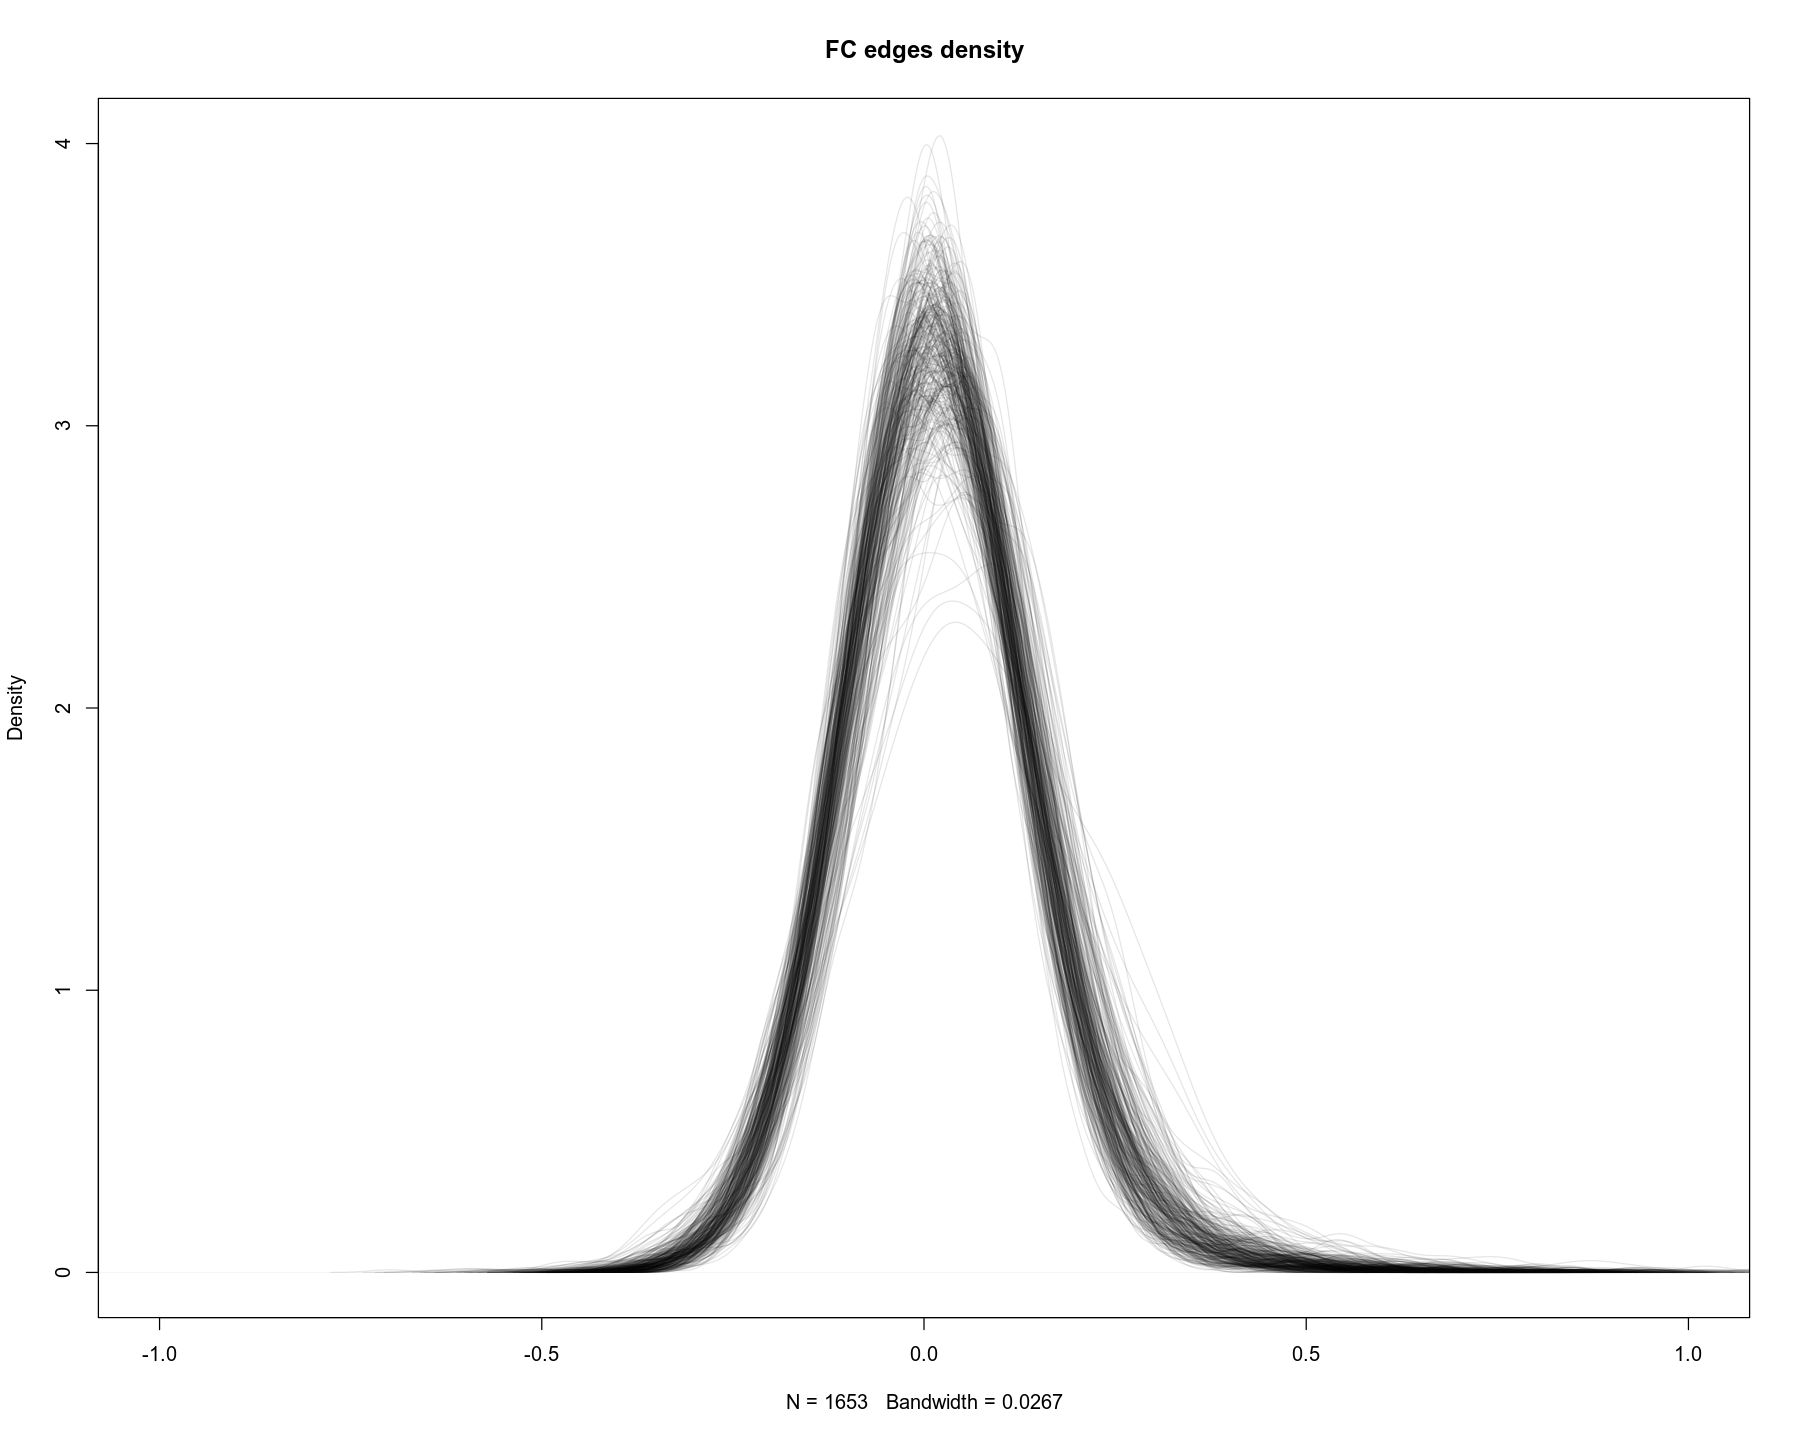

In [57]:
# Check FC densities
plot(x = density(net[1,]),
     xlim = c(-1,1),
     ylim = c(0,4),
     col = rgb(0,0,0,0.1),
     main = "FC edges density")
for(ii in 2:nrow(net)) lines(density(net[ii,]), col = rgb(0,0,0,0.1))

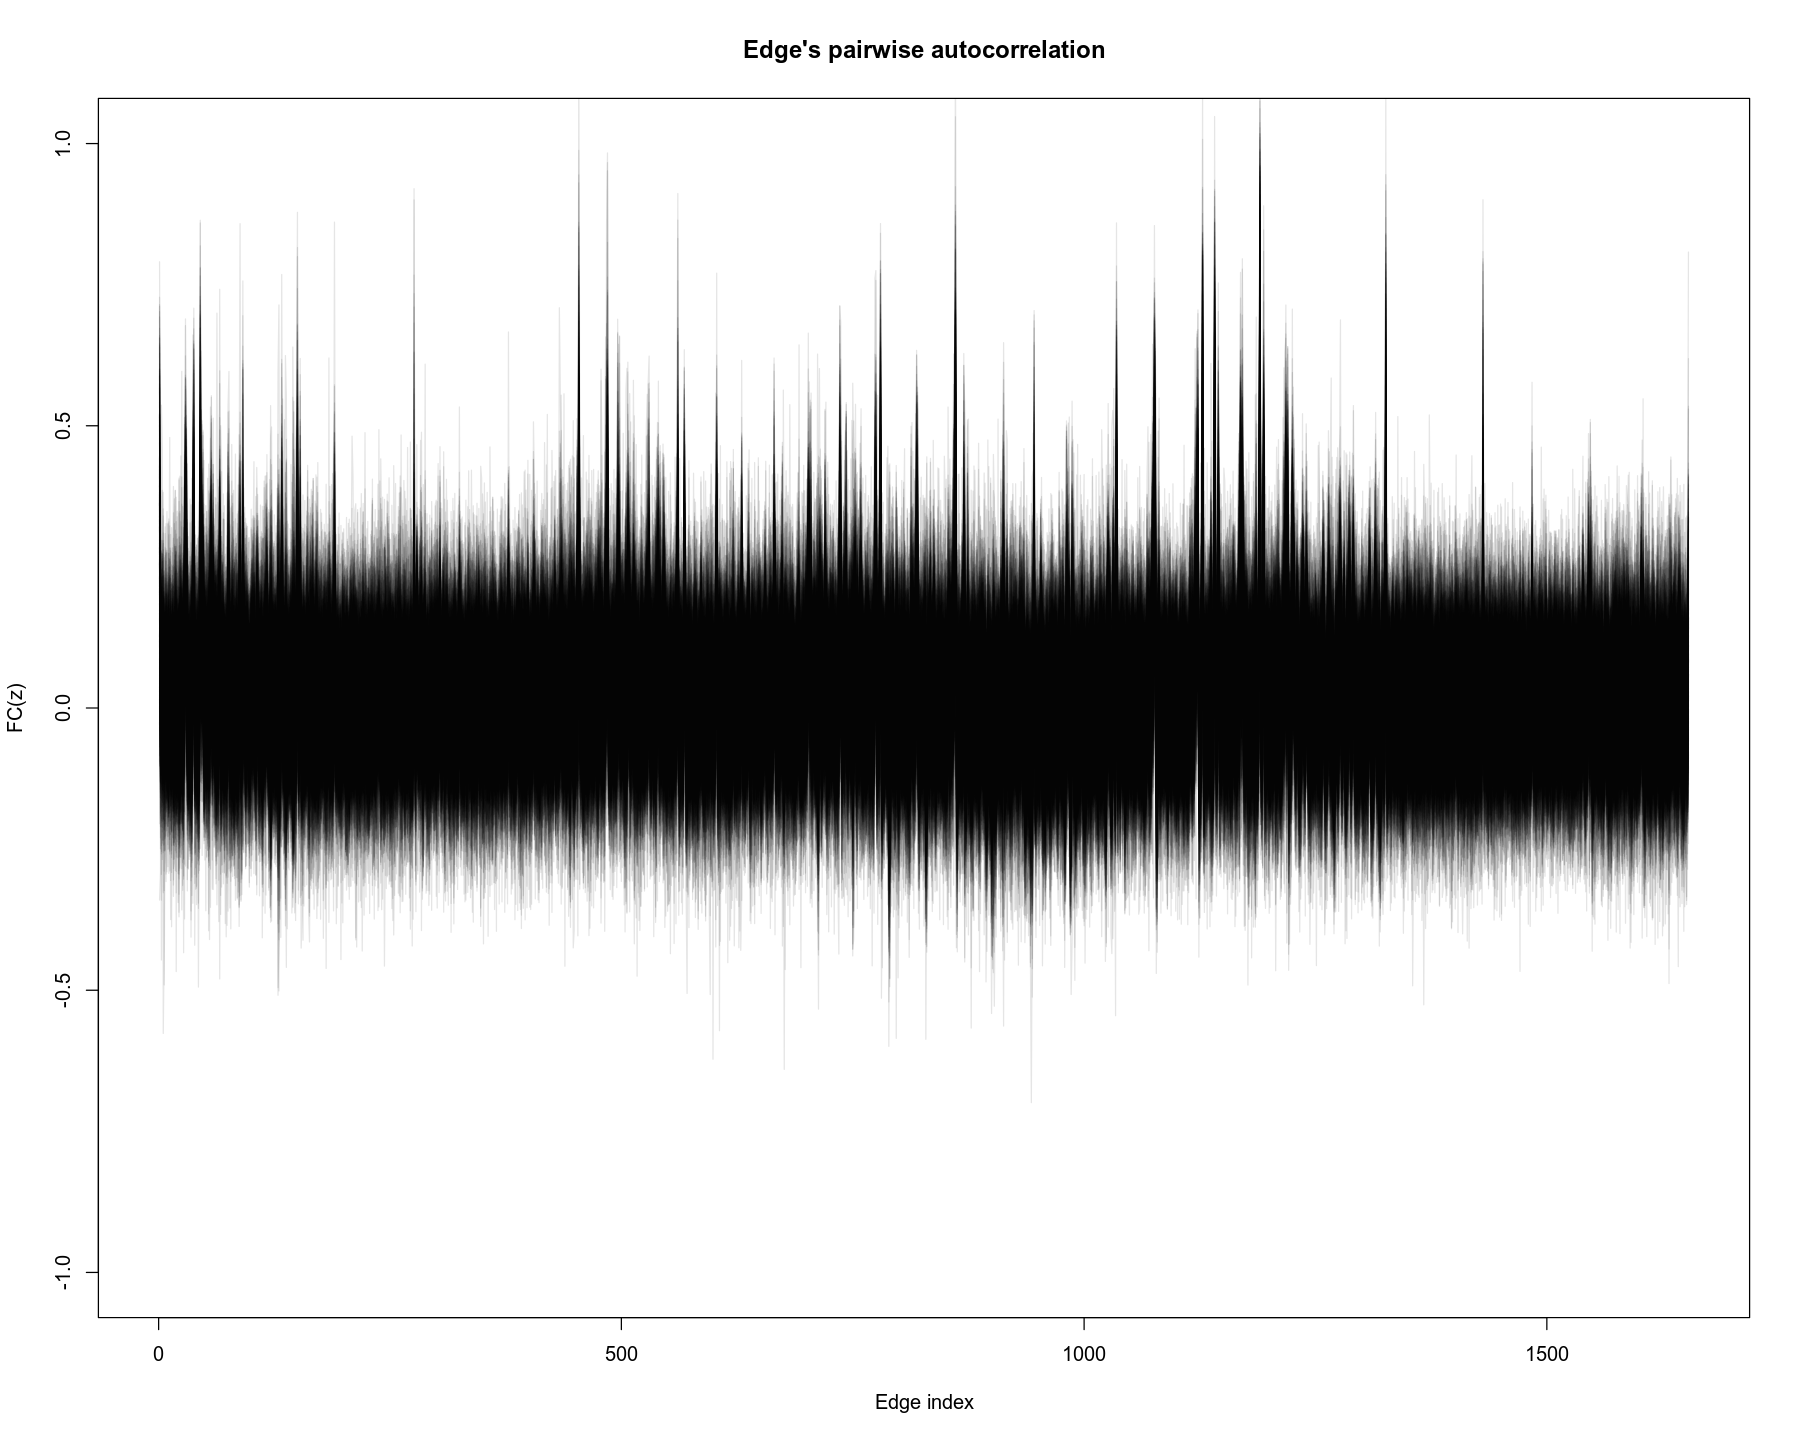

In [58]:
# Autocorrelation plot
plot(x = 1:nrow(uptri),
     y = net[1,],
     type = "l",
     ylim = c(-1,1),
     xlab = "Edge index",
     ylab = "FC(z)",
     col = rgb(0,0,0,0.1),
     main = "Edge's pairwise autocorrelation")
for(ii in 2:nrow(net)) lines(x = 1:nrow(uptri), y = net[ii,], col = rgb(0,0,0,0.1))

## **3. Seed-based analysis**

In [73]:
c(1,2,3,5) %>% map(~ dir.create(paste0("Data/MRI/Seed_based/output/ses-T",.x,"/Alc"),recursive = T) )
c(1,2,3,5) %>% map(~ dir.create(paste0("Data/MRI/Seed_based/output/ses-T",.x,"/Ctrl"),recursive = T) )

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

In [74]:
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/rabies/analysisDR_out/Session-T5/Alc/analysis_datasink/seed_correlation_maps/_split_name_sub-*_ses-*_task-rest_run-01_bold/* Data/MRI/Seed_based/output/ses-T5/Alc/",
       intern = T)

character(0)

In [76]:
system("scp -r jrasgado@niagara.computecanada.ca:/scratch/m/mchakrav/jrasgado/sudmex_alcohol_rat/analysis/fmri/rabies/analysis_out/Session-T5/Alc/analysis_datasink/group_ICA_dir/group_melodic.ica/melodic_IC.nii.gz Data/MRI/Seed_based/output/",
       intern = T)

character(0)